- **Business Case for PRCL-0017**
    - No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business.
    - Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge. In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%. No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.



- **PROJECT GOAL**

    - Help No-Churn with their use cases with ML
        - Understanding the variables that are influencing the customers to migrate.
        - Creating Churn risk scores that can be indicative to drive retention campaigns.
        - Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers. help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.,

In [107]:
#Library to connect with MySql
import mysql.connector

# Import important libraries 
import pandas as pd
import numpy as np

# Import important labraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import labraries for handling categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import important labraries to handle unbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Libraries to split data into train and test data
from sklearn.model_selection import train_test_split

# Libraries for statistical operations
from scipy.stats import chi2_contingency,ttest_ind,skew
from scipy import stats

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import models algorithms
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost

# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# Establishing a connection to the MySQL Database
Connection = mysql.connector.connect(
    host='18.136.157.135',
    user='dm_team3',
    password='DM!$!Team!27@9!20&',
    database='project_telecom',
    auth_plugin='mysql_native_password'
)


In [3]:
query ='SELECT * FROM telecom_churn_data'
tele=pd.read_sql_query(query,Connection)

In [4]:

columns=['State','Account Length','Area Code','phone','International Plan','Vmail Plan','Vmail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve charge','Night Mins','Night Calls','Night charge','International Mins','International calls','International charge','CustServ Calls','Churn']

In [5]:
# Setting columns name
tele.columns = columns

In [6]:
# Define the desired data types for each columns
column_data_types ={
    'State':'str','Account Length':'int64','Area Code':'int64','phone':'str','International Plan':'str','Vmail Plan':'str','Vmail Message':'int64','Day Mins':'float','Day Calls':'int64','Day Charge':'float','Eve Mins':'float','Eve Calls':'int64','Eve charge':'float','Night Mins':'float','Night Calls':'int64','Night charge':'float','International Mins':'float','International calls':'int64','International charge':'float','CustServ Calls':'int64','Churn':'str'
}


In [7]:
tele = tele.astype(column_data_types)

In [8]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   Vmail Plan            4617 non-null   object 
 6   Vmail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night charge         

In [9]:
# Export DataFrame to CSV
tele.to_csv('PM-PR-0017.csv', index=False)

In [10]:
tele=pd.read_csv('PM-PR-0017.csv')

In [11]:
# show first 5 rows of data
tele.head()

,State,Account Length,Area Code,phone,International Plan,Vmail Plan,Vmail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve charge,Night Mins,Night Calls,Night charge,International Mins,International calls,International charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
# show last 5 rows of data
tele.tail()

,State,Account Length,Area Code,phone,International Plan,Vmail Plan,Vmail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve charge,Night Mins,Night Calls,Night charge,International Mins,International calls,International charge,CustServ Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.80,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [13]:
# Print shape of the dataset
print("Shape of the Data: ", tele.shape)

Shape of the Data:  (4617, 21)


In [14]:
# It will show all details of data 
# Such as Data Types, Total entries, Total numbers of columns, 
# Null values and memory usage
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   Vmail Plan            4617 non-null   object 
 6   Vmail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night charge         

In [15]:
# It will give all statistical information of columns having numerical data type
tele.describe()

,Account Length,Area Code,Vmail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve charge,Night Mins,Night Calls,Night charge,International Mins,International calls,International charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
# It will give you all statistical information of columns having categorical data type
tele.describe(include='O')

,State,phone,International Plan,Vmail Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


In [17]:
# phone column has all values are unique , so it is irrevalent column
tele.drop('phone', axis=1, inplace=True)

In [18]:
# Finding duplicates observations 
tele.duplicated().sum()

0

In [19]:
# It will shows target variable observations count
tele.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

In [20]:
# Names of all columns
tele.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Vmail Plan', 'Vmail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve charge', 'Night Mins', 'Night Calls',
       'Night charge', 'International Mins', 'International calls',
       'International charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [21]:
# Numeric Columns in dataset
numeric_data=tele.select_dtypes(include="number")
tele_numeric = numeric_data.columns
print("Number of Columns having numerical values:",len(tele_numeric))
print("\n Names of Columns having numerical values:\n",list(tele_numeric))

Number of Columns having numerical values: 16

 Names of Columns having numerical values:
 ['Account Length', 'Area Code', 'Vmail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve charge', 'Night Mins', 'Night Calls', 'Night charge', 'International Mins', 'International calls', 'International charge', 'CustServ Calls']


In [22]:
# Categorical Columns in dataset
cat_data = tele.select_dtypes(exclude="number") 
tele_categorical = cat_data.columns 
print("Number of columns having categorical value:", len(tele_categorical))
print("\n""Names of columns having categorical value:\n", list(tele_categorical))

Number of columns having categorical value: 4

Names of columns having categorical value:
 ['State', 'International Plan', 'Vmail Plan', 'Churn']


#  Exploratory Data Analysis (EDA)

# Univariant Analysis

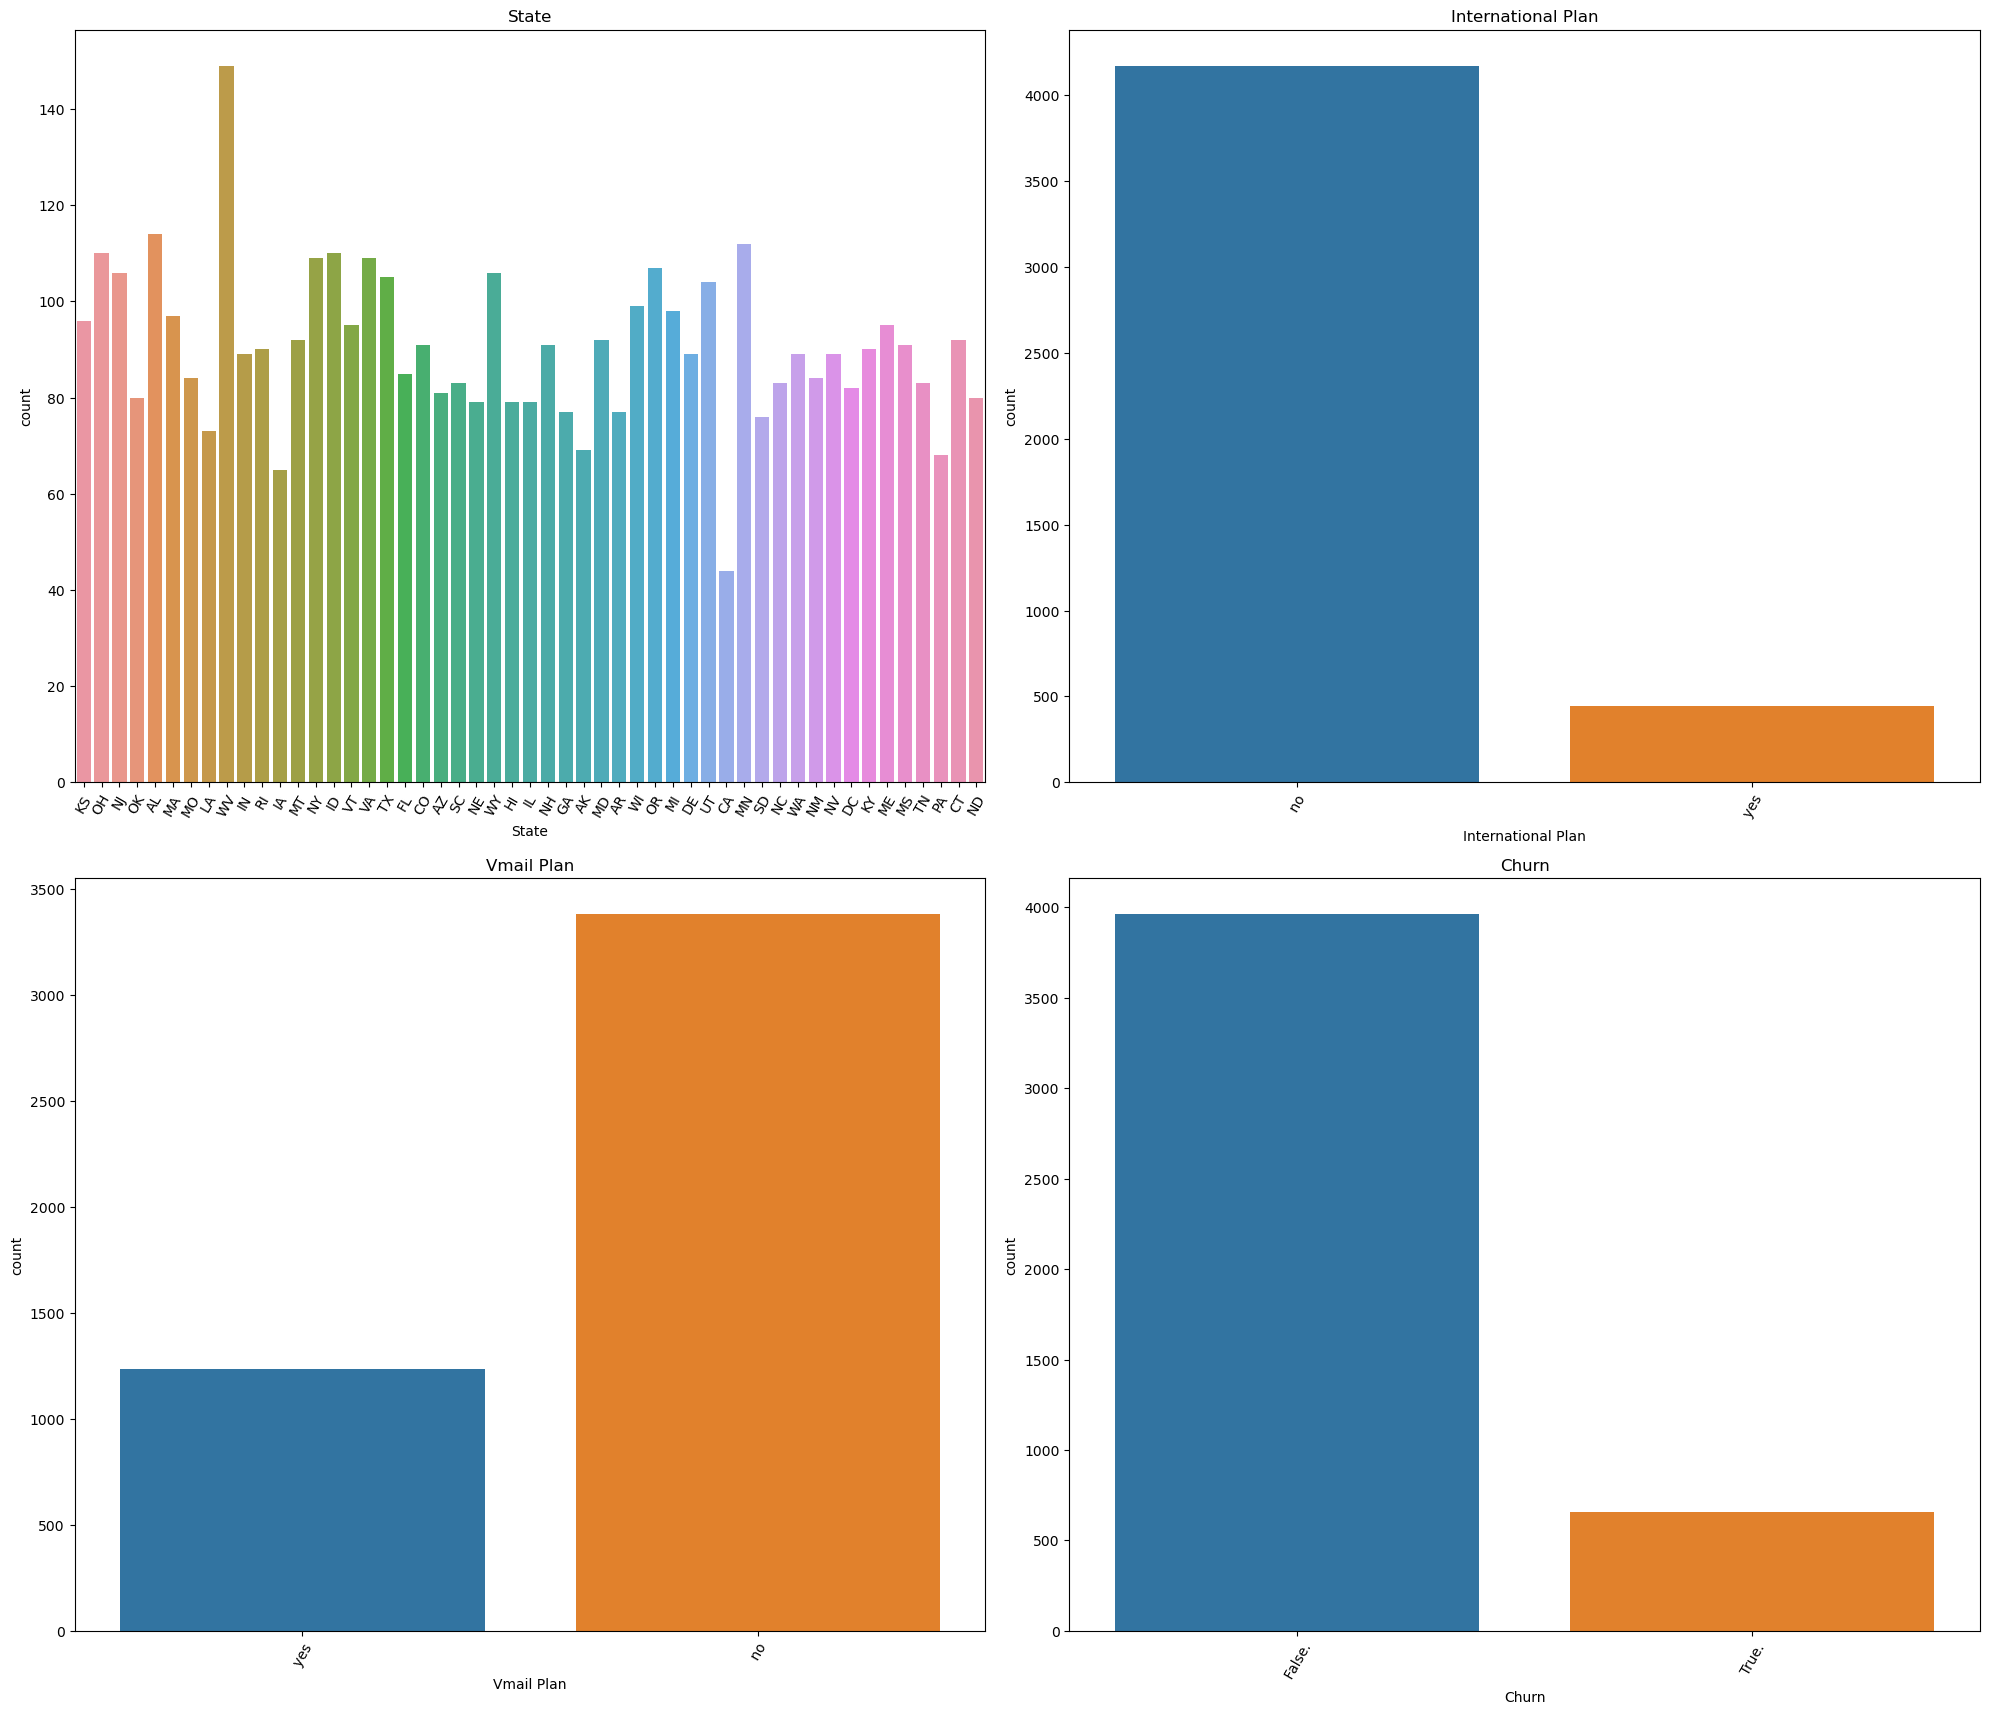

In [23]:
# Select the categorical columns
categorical_col = tele.select_dtypes(include=['object']).columns

# Plotting a countplot for each of the categorical variables
plt.figure(figsize=(20, 25))  # Canvas size

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 2, i)  
    sns.countplot(x=column, data=tele)
    plt.xticks(rotation=60)
    plt.title(column)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

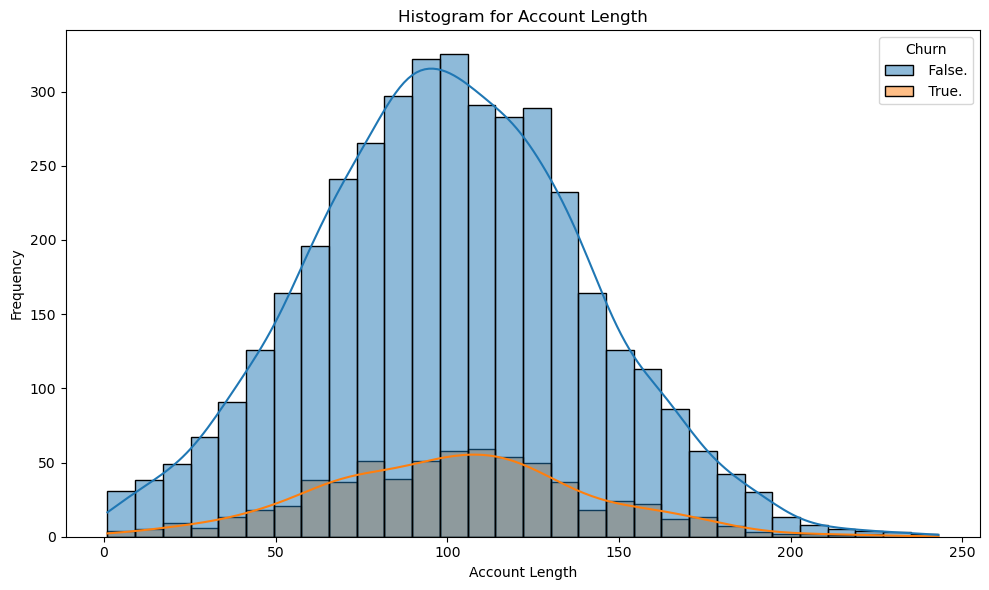

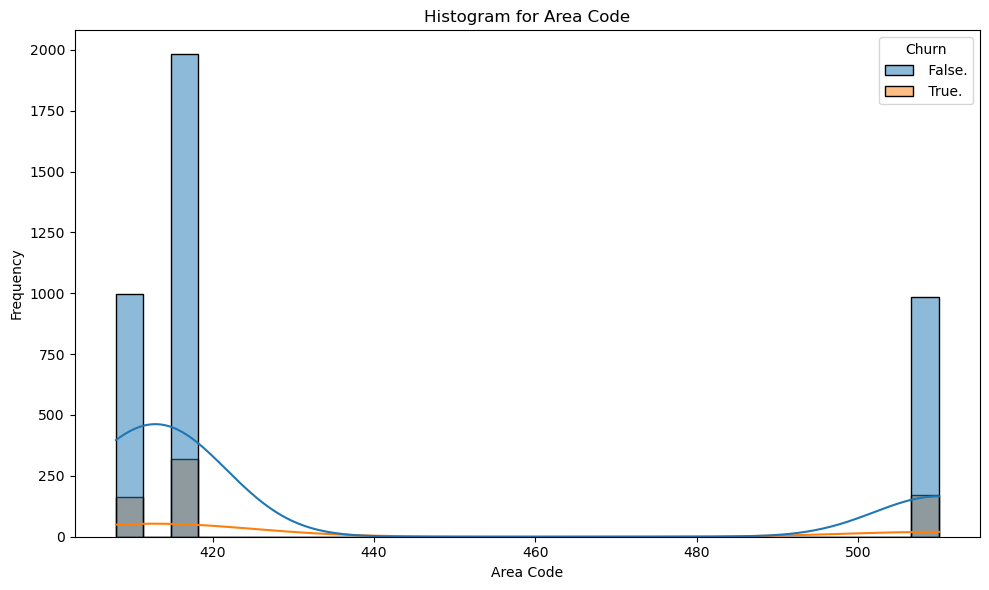

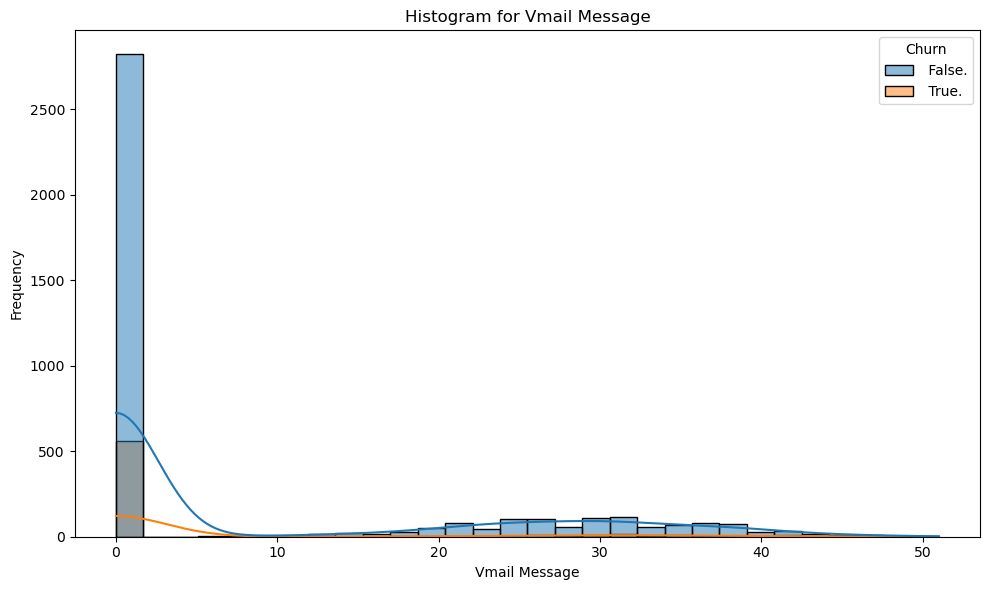

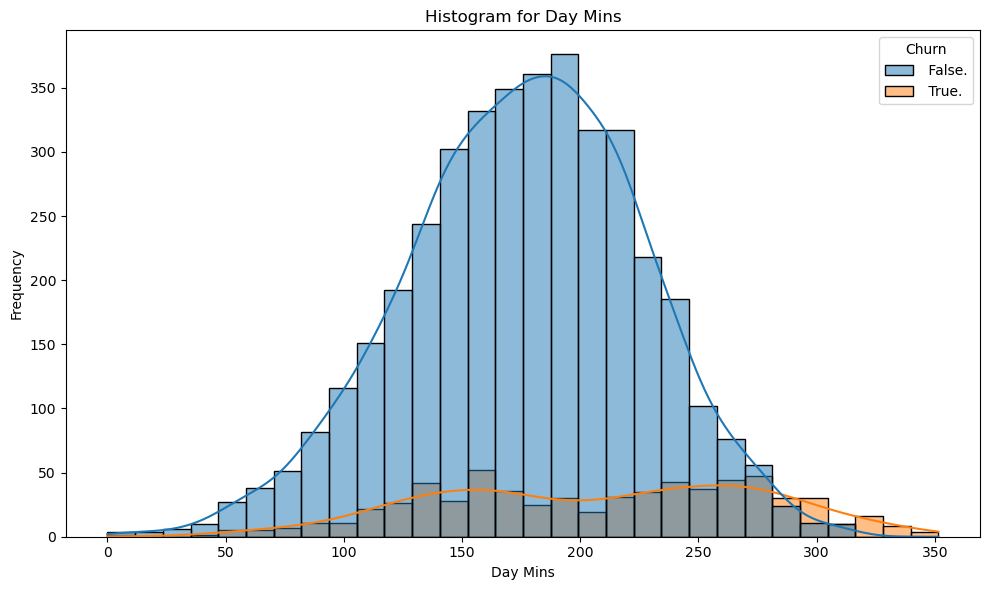

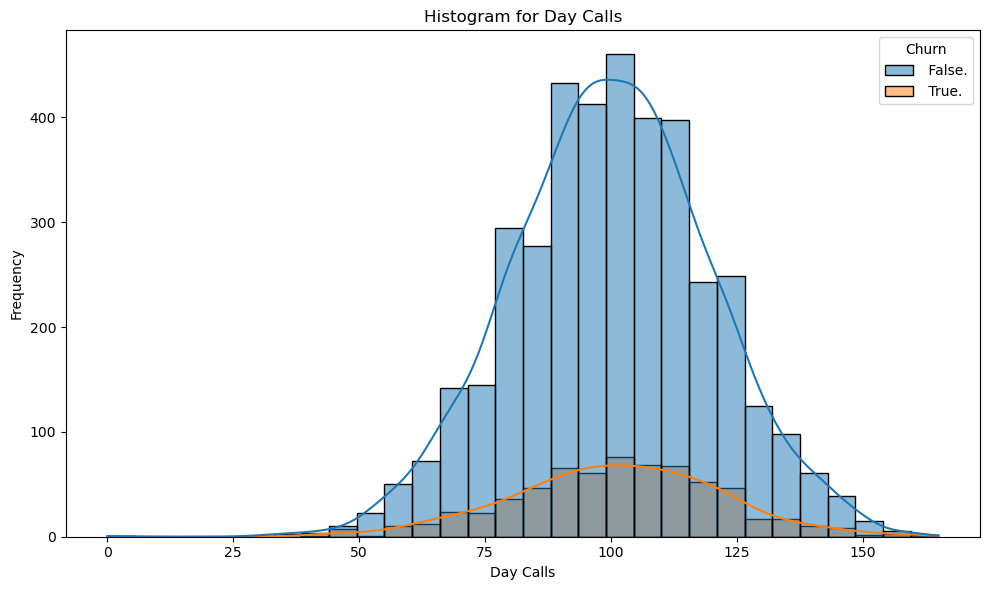

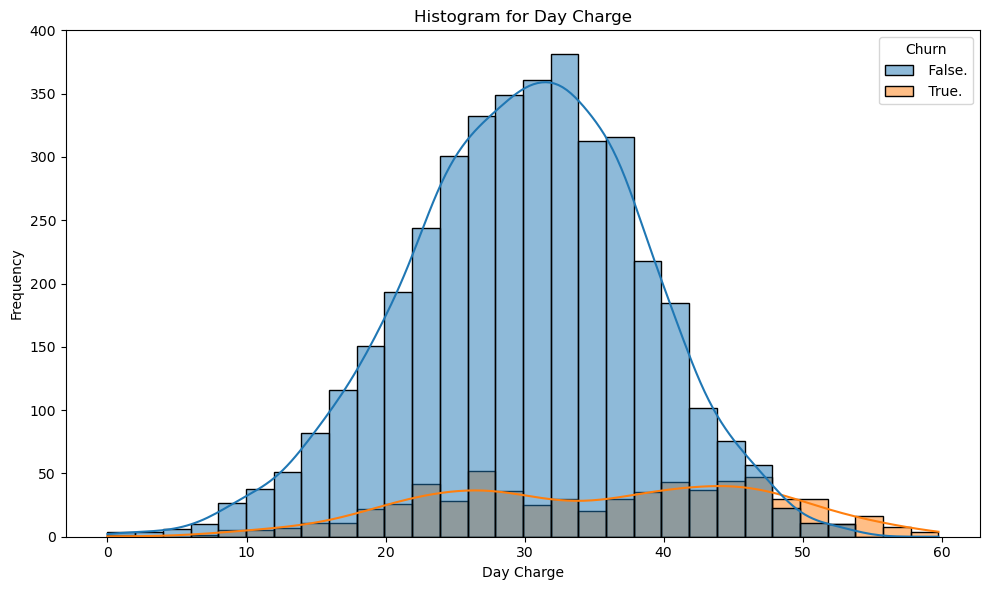

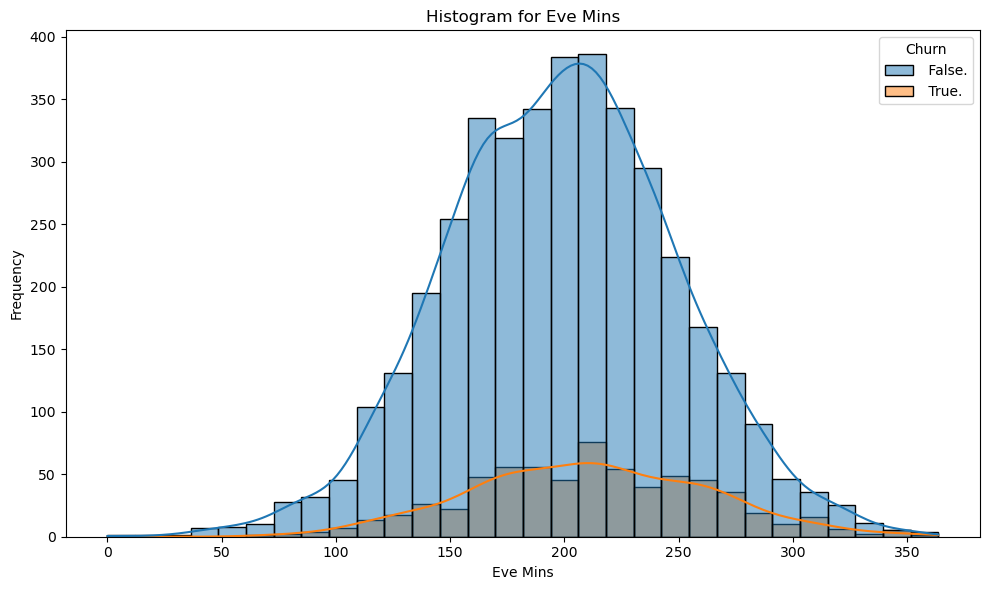

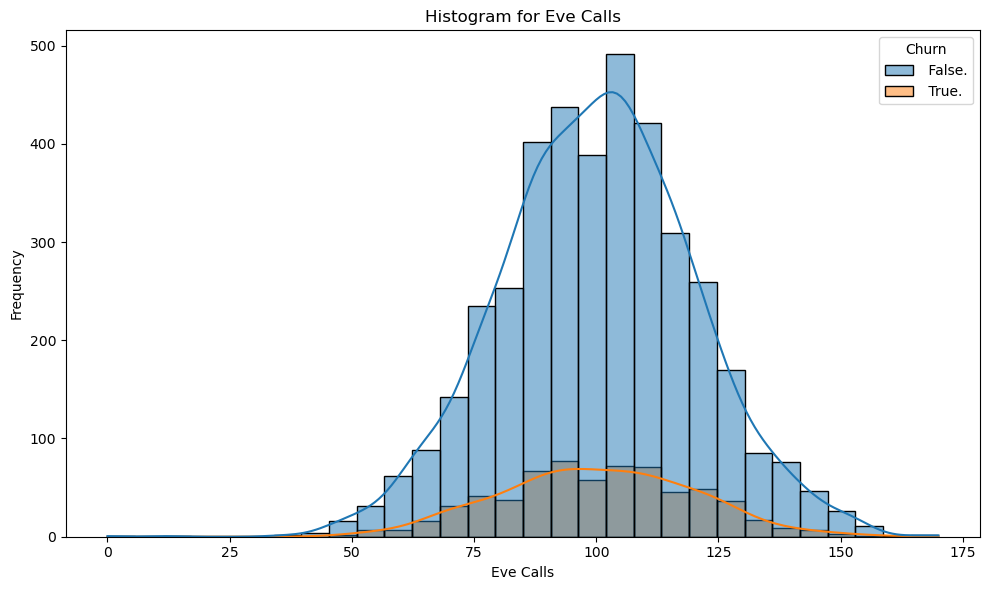

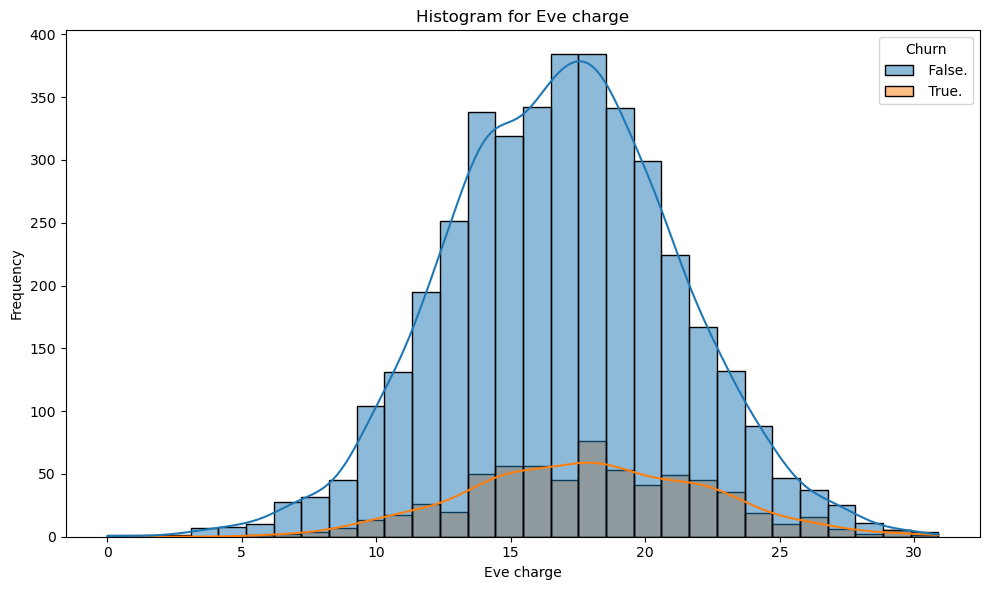

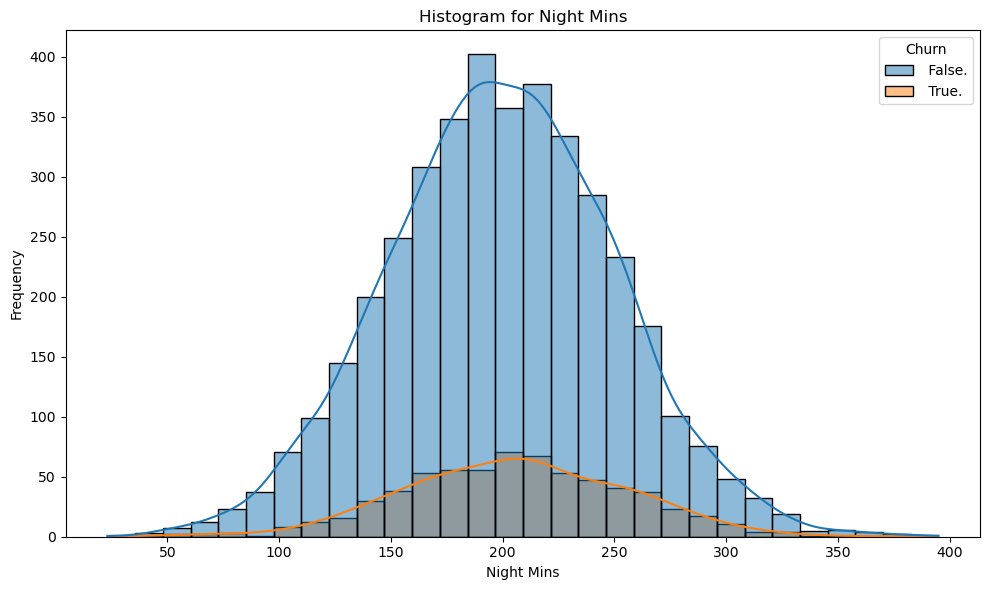

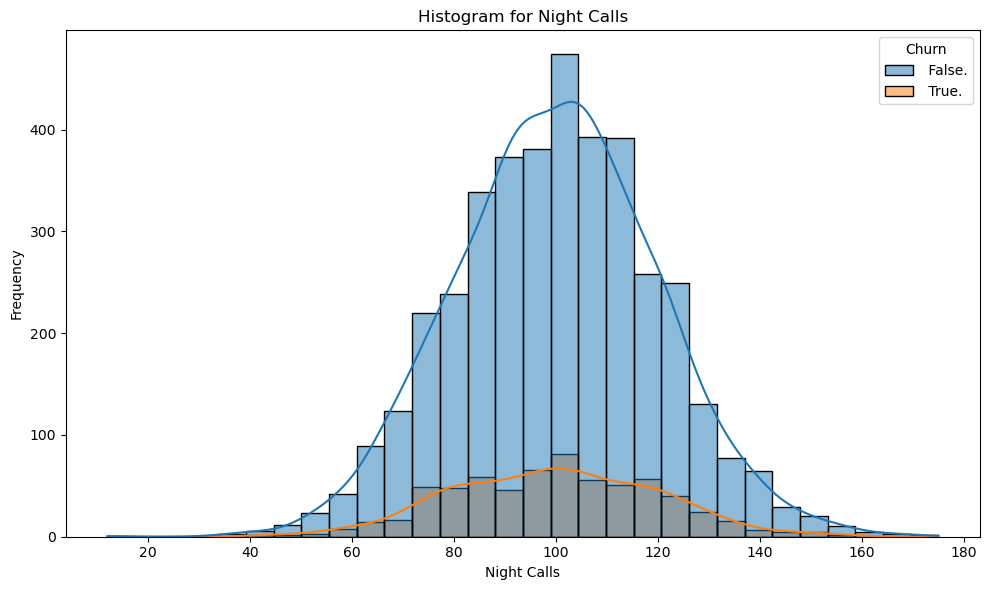

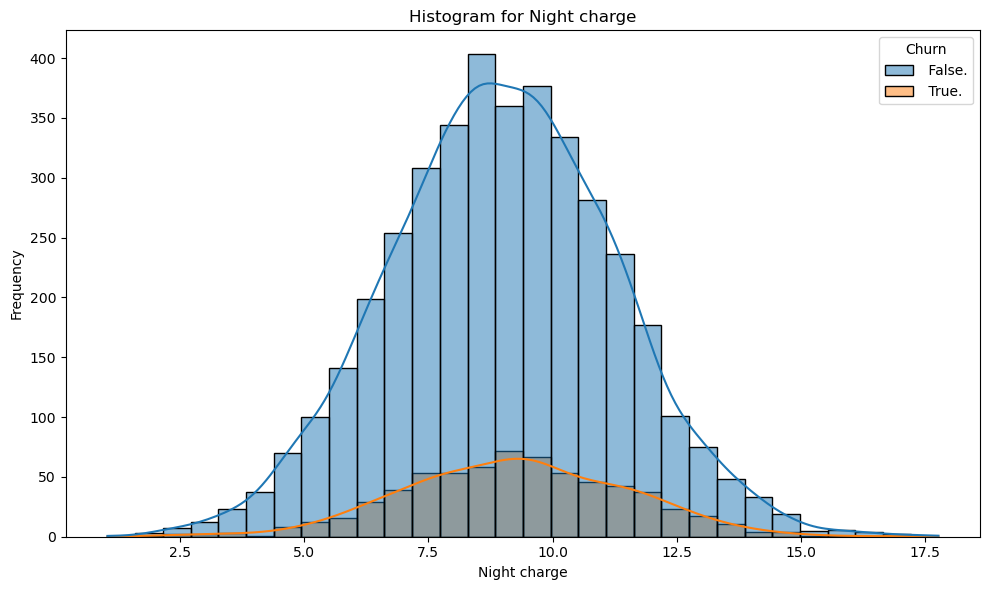

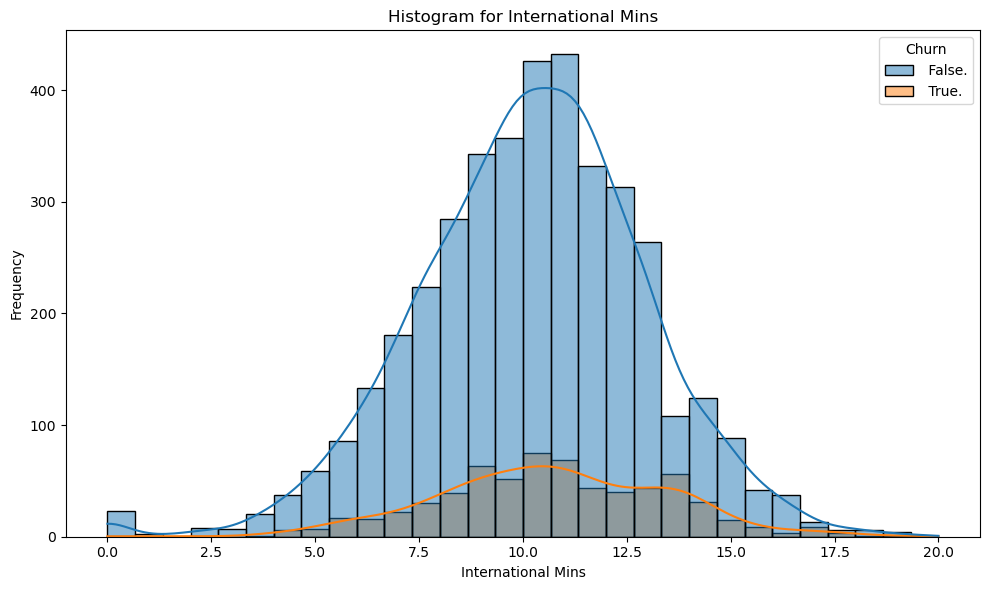

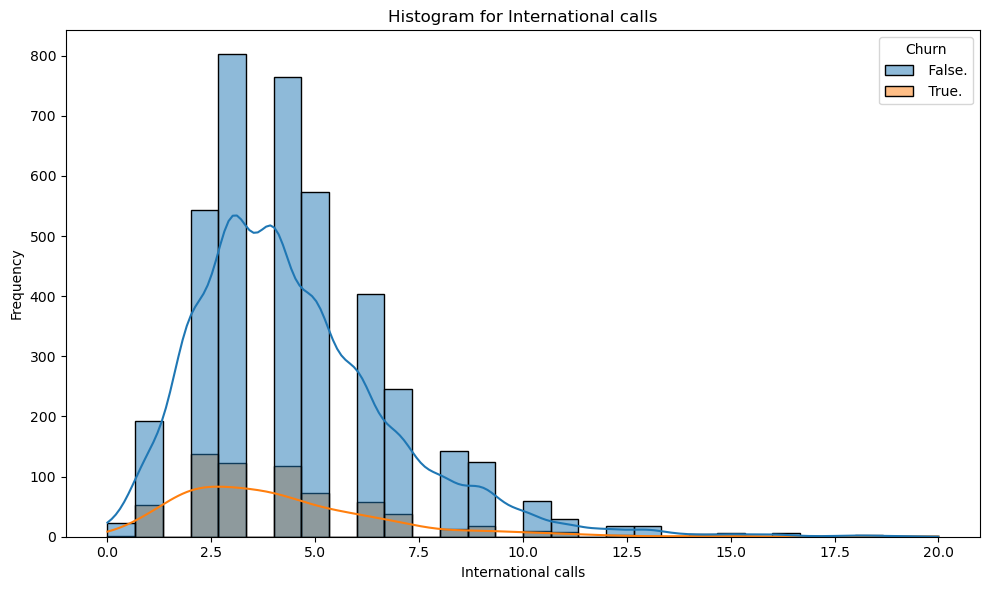

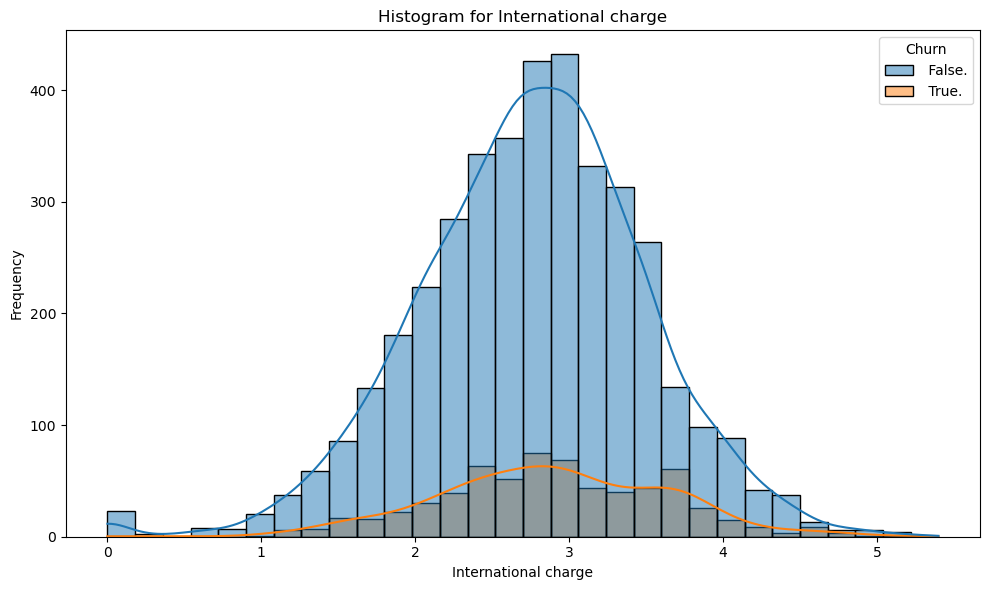

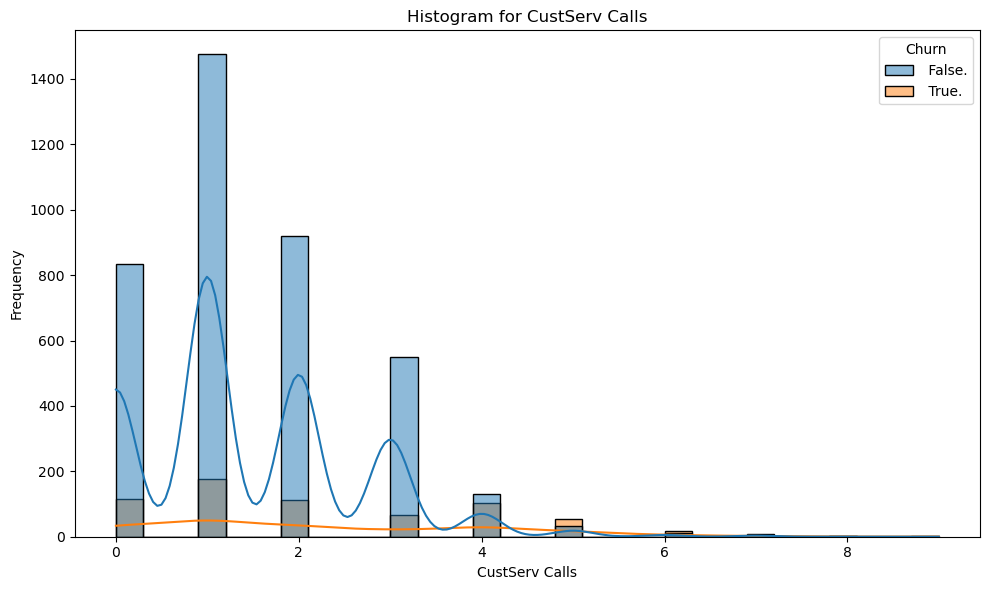

In [24]:
# ploting a histogram for each continous variable with different colors
for i, column in enumerate(tele_numeric):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=tele, x=column, hue=tele.Churn, bins=30, kde=True)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [25]:
# Select numeric columns
numeric_columns = tele.select_dtypes(include=['float', 'int']).columns

# Create a DataFrame to store the results
skewness_results = pd.DataFrame(columns=['Column', 'Skewness', 'Skewness Interpretation'])

# Check skewness for each numeric column
for column in numeric_columns:
    skewness = tele[column].skew()
    
    # Determine skewness interpretation
    if abs(skewness) < 0.5:
        interpretation = "Approximately symmetric (skewness < 0.5)"
    elif abs(skewness) < 1:
        interpretation = "Moderately skewed"
    else:
        interpretation = "Highly skewed"

    # Append results to the new DataFrame
    skewness_results = skewness_results.append({
        'Column': column,
        'Skewness': skewness,
        'Skewness Interpretation': interpretation
    }, ignore_index=True)

# Display the results DataFrame
print(skewness_results)

                  Column  Skewness                   Skewness Interpretation
0         Account Length  0.106248  Approximately symmetric (skewness < 0.5)
1              Area Code  1.135333                             Highly skewed
2          Vmail Message  1.326734                             Highly skewed
3               Day Mins -0.002948  Approximately symmetric (skewness < 0.5)
4              Day Calls -0.081013  Approximately symmetric (skewness < 0.5)
5             Day Charge -0.002952  Approximately symmetric (skewness < 0.5)
6               Eve Mins -0.005280  Approximately symmetric (skewness < 0.5)
7              Eve Calls -0.017554  Approximately symmetric (skewness < 0.5)
8             Eve charge -0.005252  Approximately symmetric (skewness < 0.5)
9             Night Mins  0.020515  Approximately symmetric (skewness < 0.5)
10           Night Calls  0.030886  Approximately symmetric (skewness < 0.5)
11          Night charge  0.020507  Approximately symmetric (skewness < 0.5)

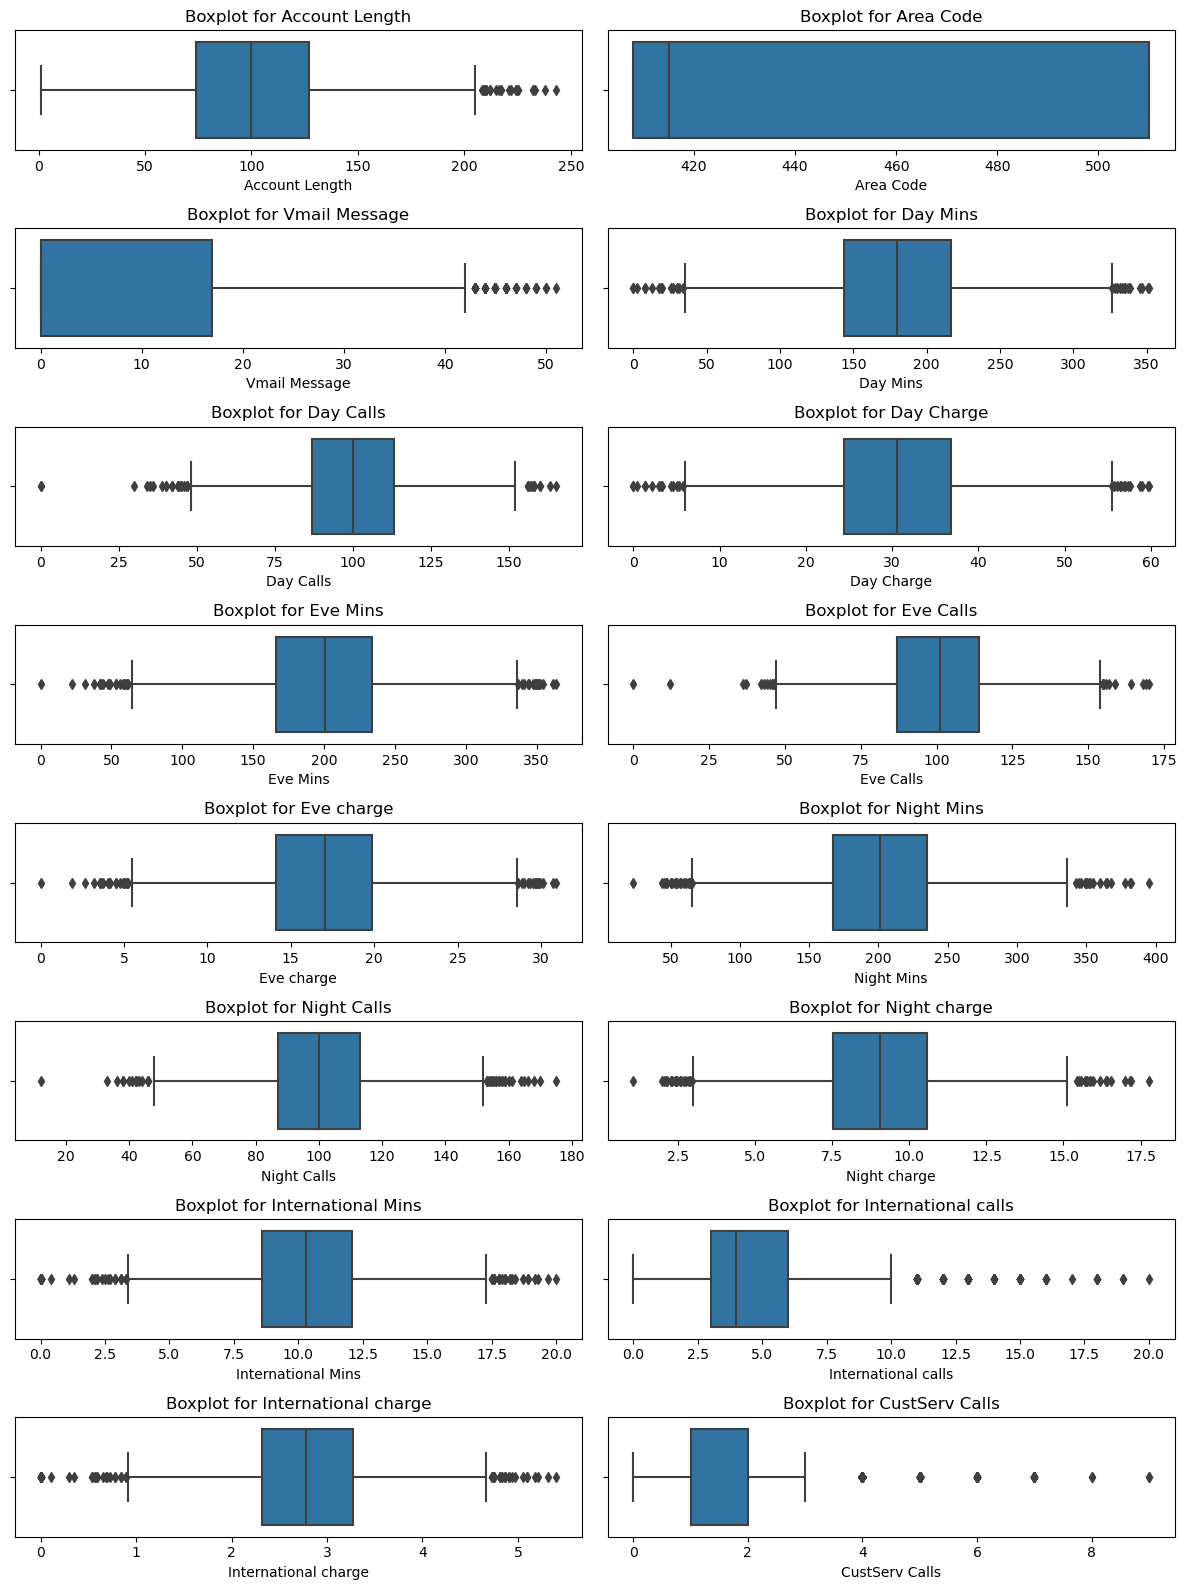

In [26]:
# Plotting of BoxPlot to check presence of Outliers

fig, axes = plt.subplots(8, 2, figsize=(12, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(tele_numeric):
    sns.boxplot(x=column, data=tele, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()       
                      


- Observations:
    - All columns have outliers

#  Bivariant Analysis

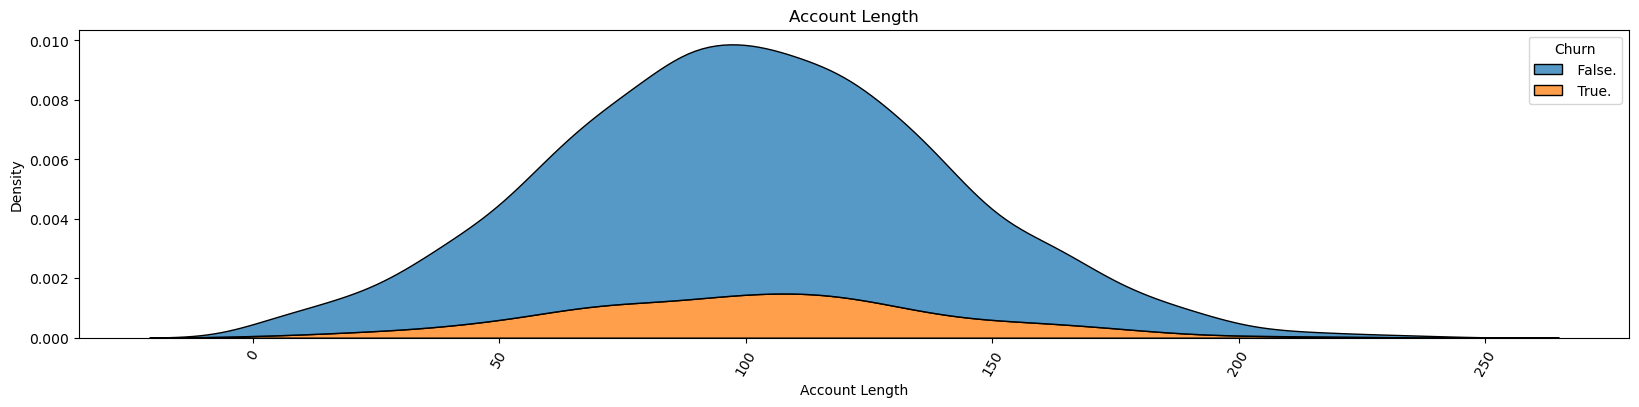

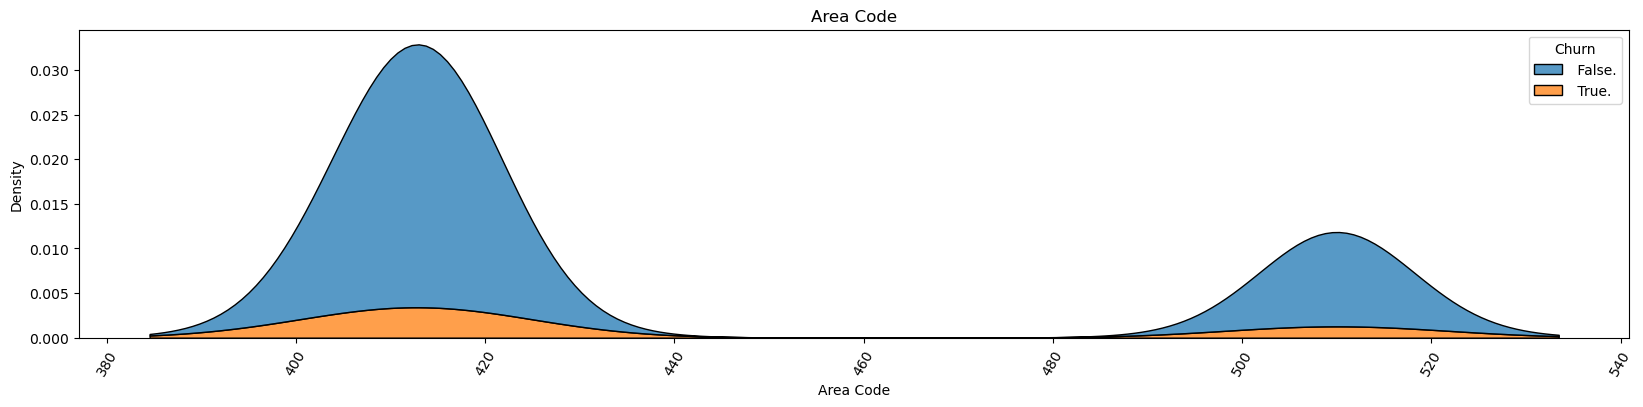

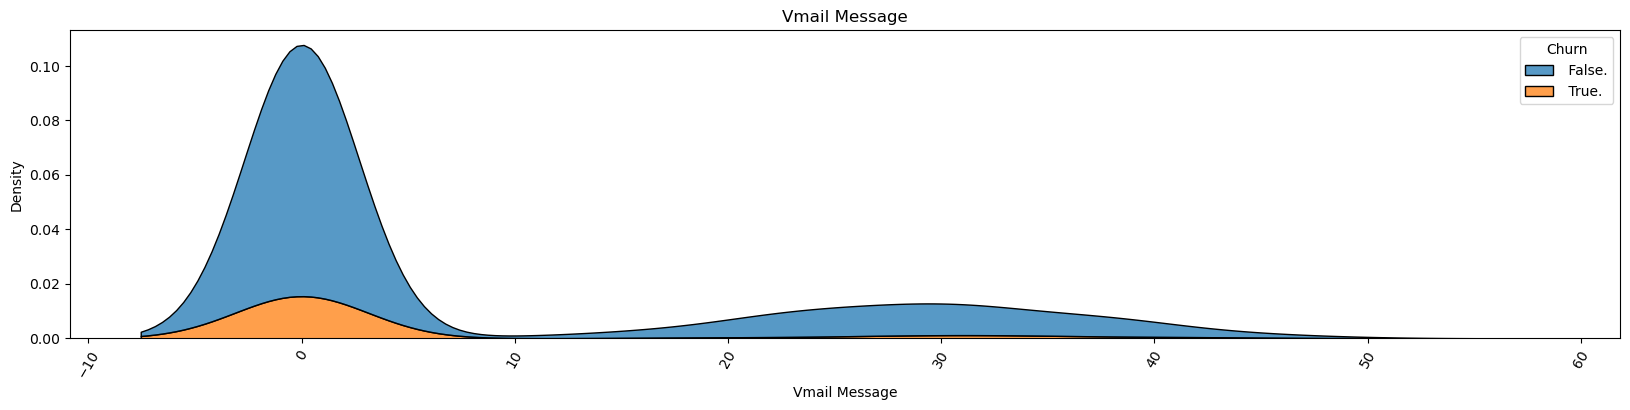

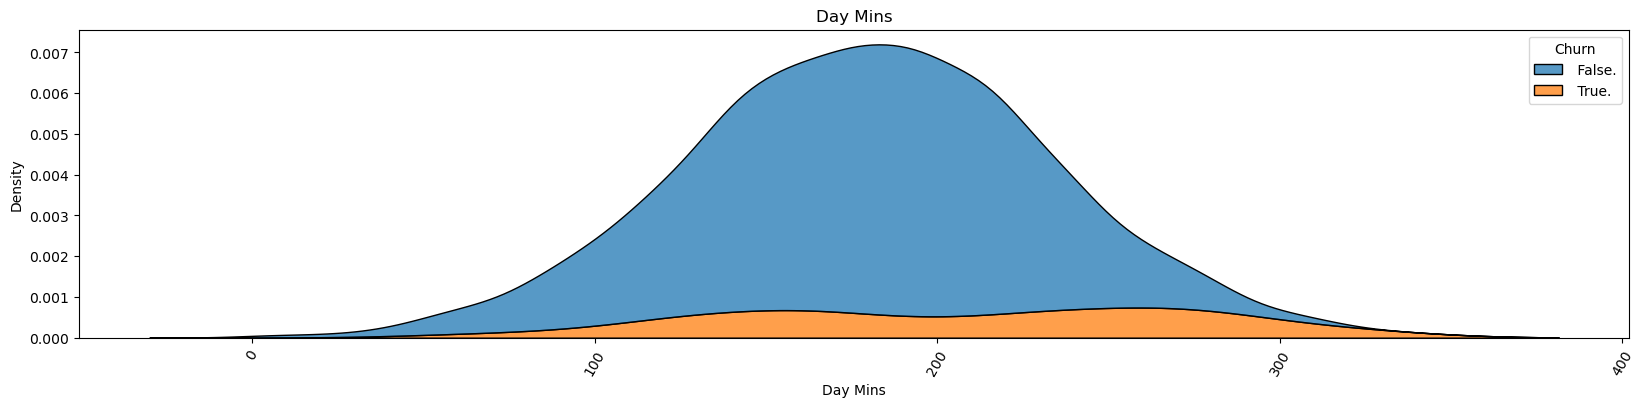

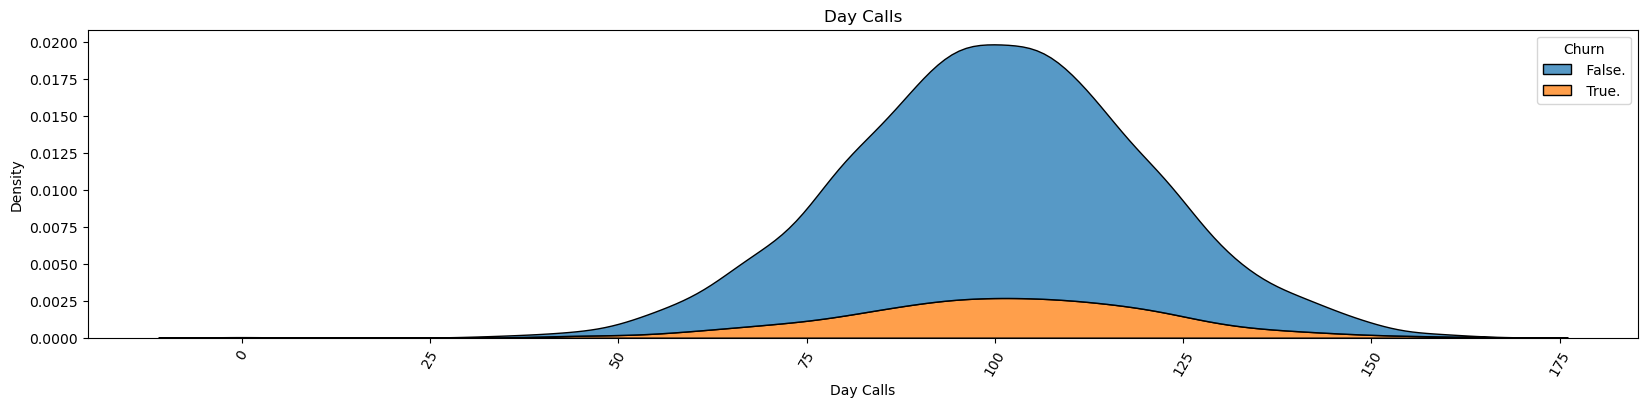

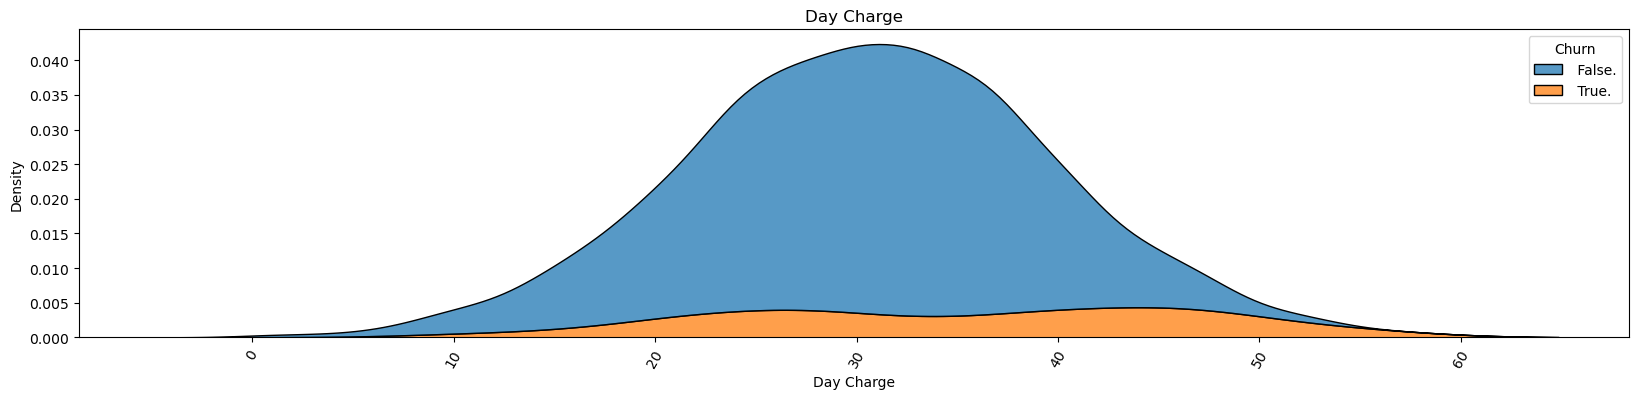

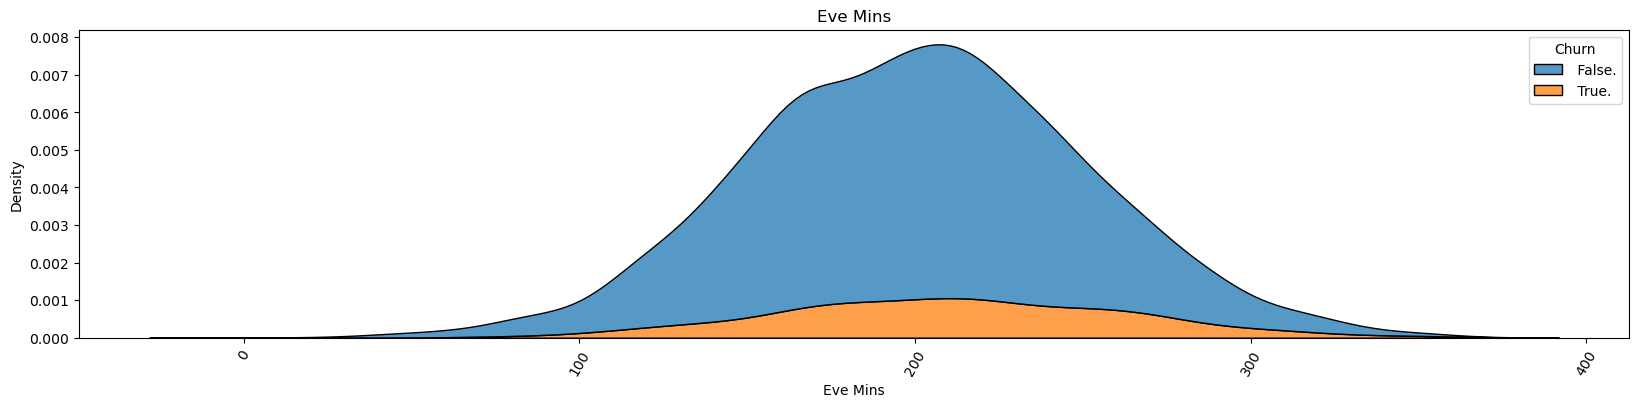

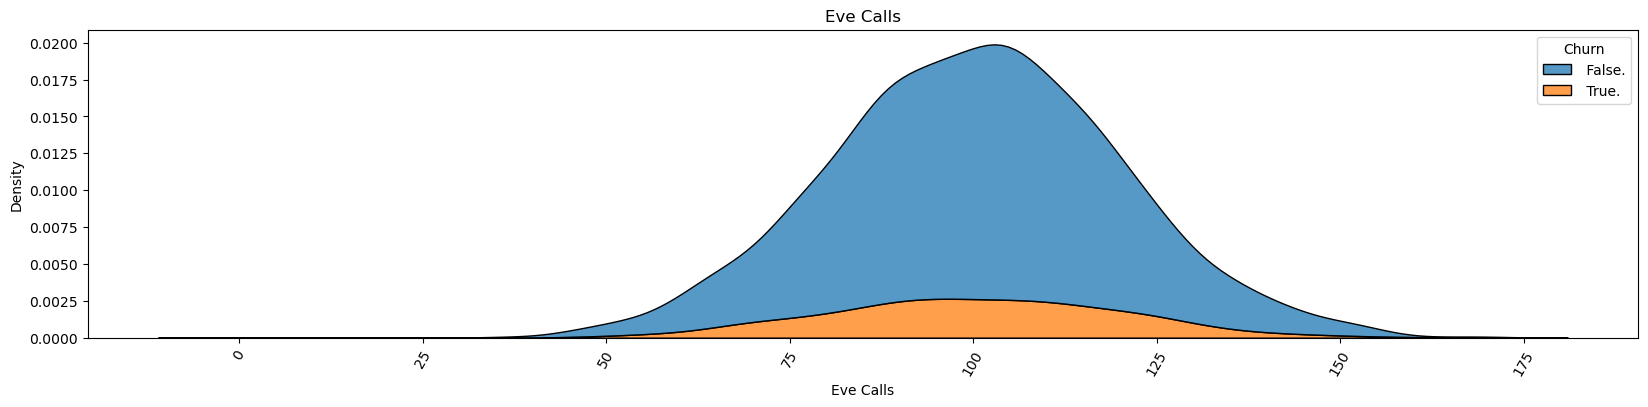

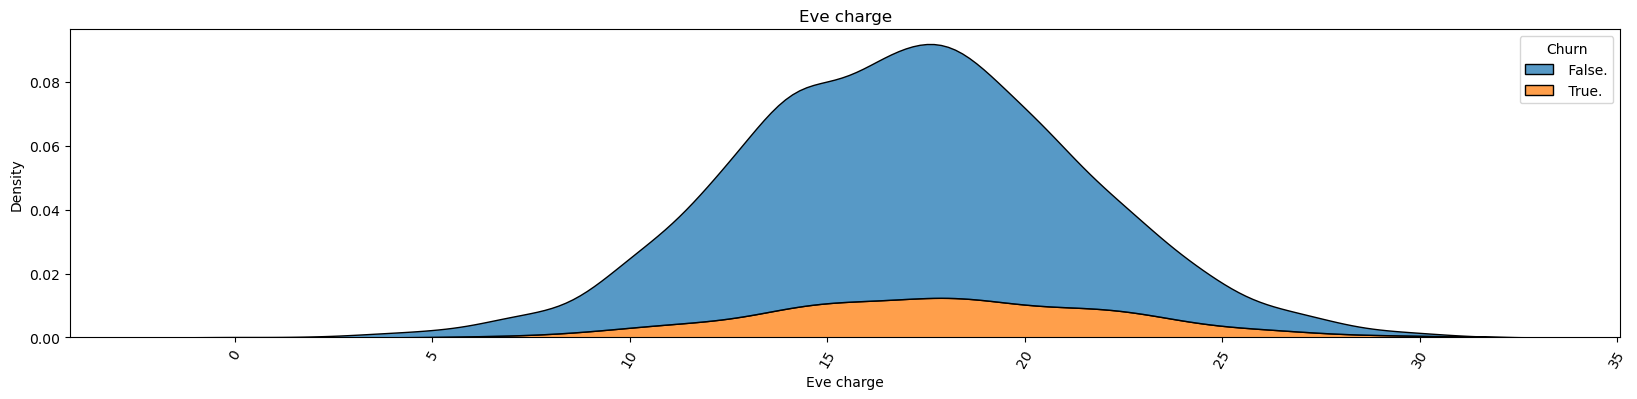

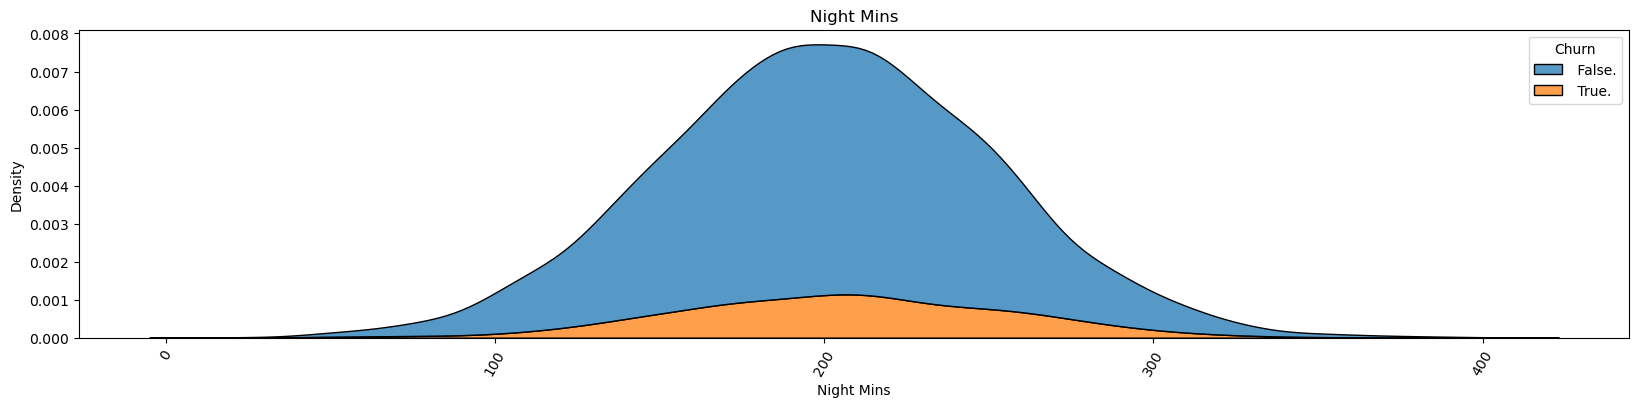

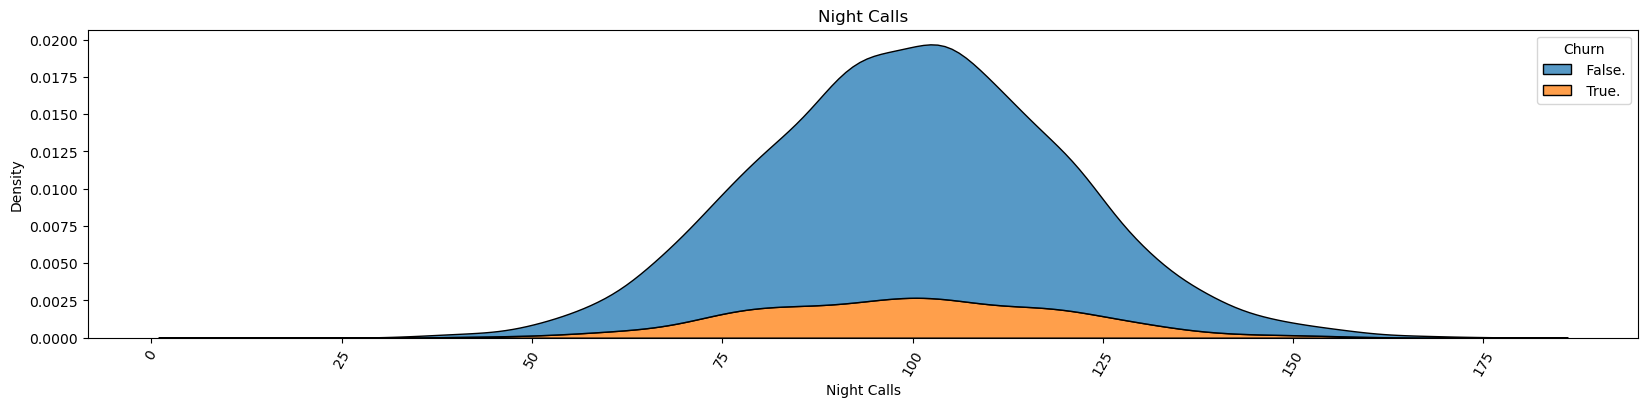

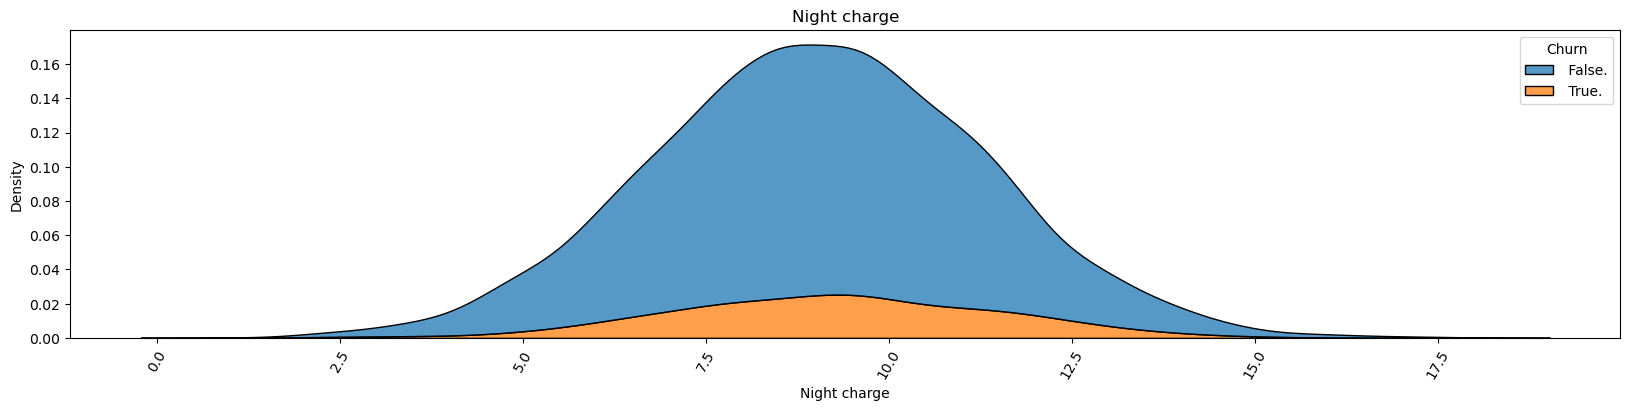

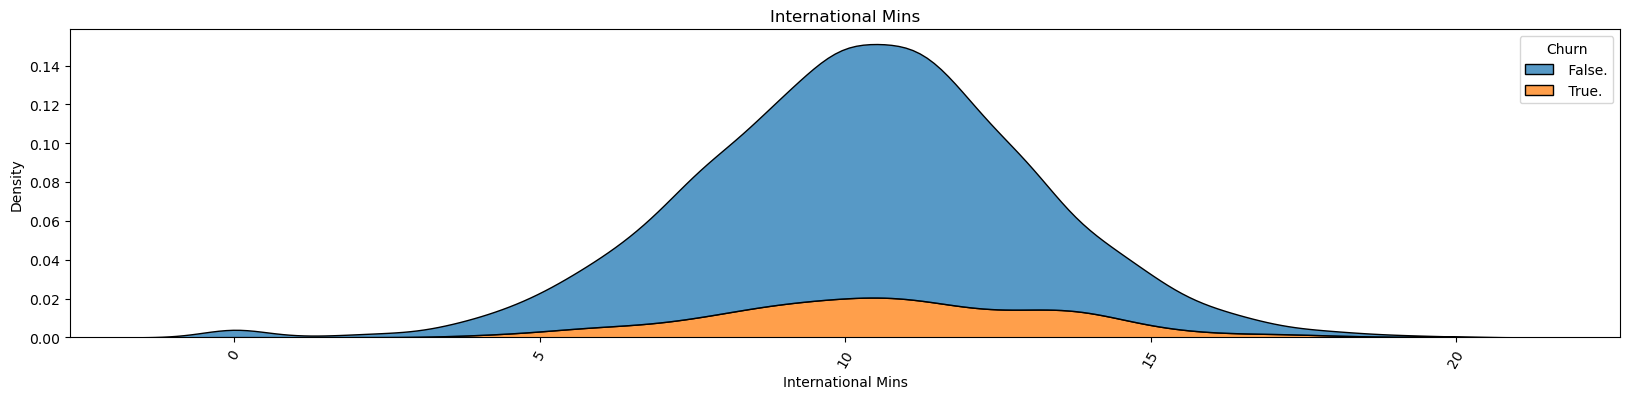

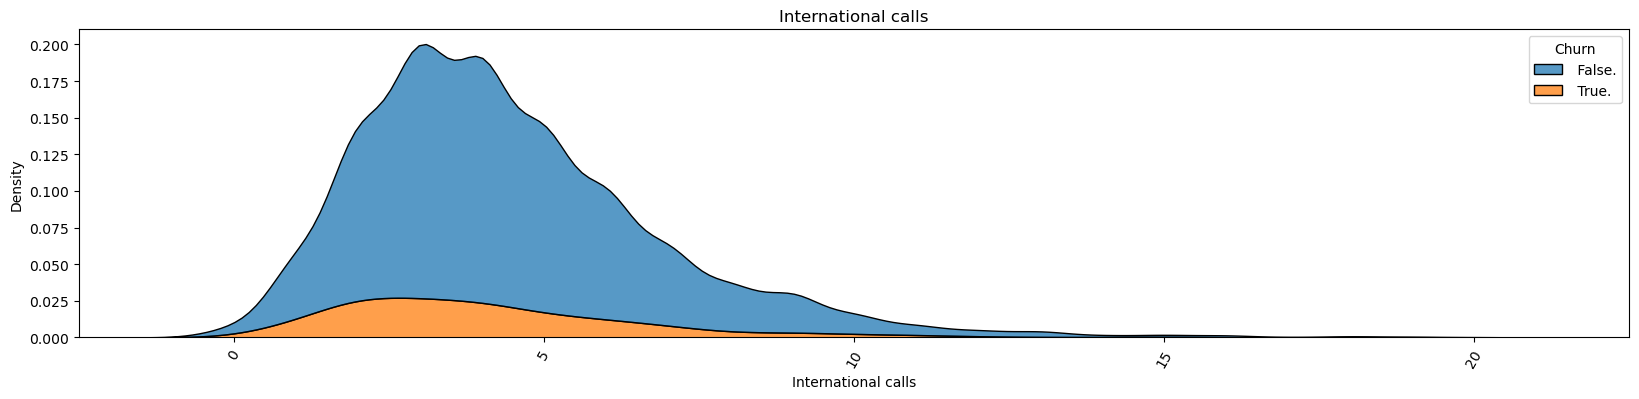

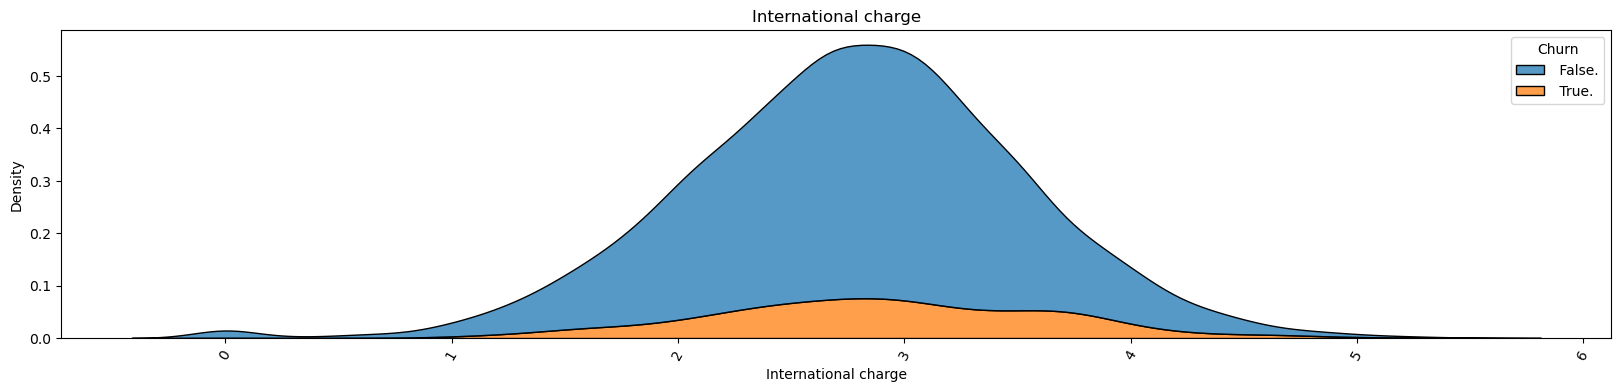

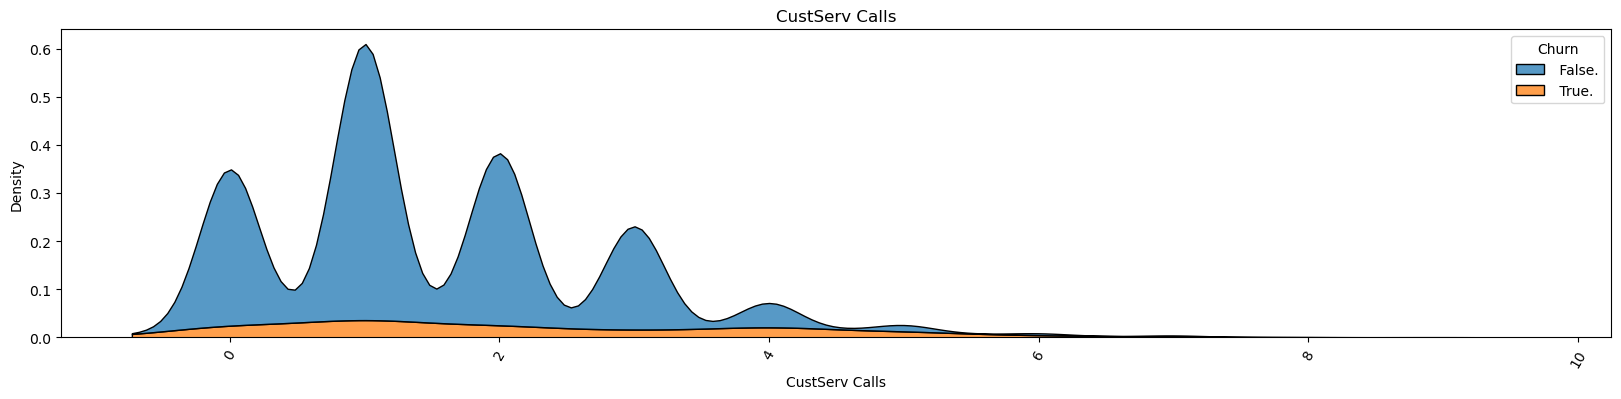

In [27]:
# Select numeric columns
num_disc_col = tele.select_dtypes(include=['number']).columns

# Plotting a count plot for each categorical variable with different colors
for column in num_disc_col:
    plt.figure(figsize=(20, 4))
    sns.kdeplot(x=tele[column], hue=tele['Churn'], data=tele, shade=True, fill=True, multiple='stack', bw_adjust=1)
    plt.title(column)
    plt.xticks(rotation=60)
    plt.show()

- **Business Insights:**
    - Account length of duratioon 60 to 140 days has higher churn. Highest churn is in the range of 100-120 days.
    - People without voice message plan are 86% and with the plan are 14%. We can imply that if we offer more voice message plan it can help us reduce the churn.
    - 42% of churn area from Are Code 415 and the top 5 churn are from WV, AL, MN, ID and OH states.
    - After 3 customer service calls, the churn rate spikes up.
    - Cut-off for churn rate has been set to 0.18% which gives the highest Recall of 88% and efficiency of 95%. 

In [28]:
# Creating crosstable with represent to Target Variable "y"
num_columns = tele.select_dtypes(exclude="object").columns

for cat_col in num_columns:
    cross_tab = pd.crosstab(tele[cat_col], tele['Churn'], margins=True, margins_name='Total')
    print(f"\n\nCross-tabulation for {cat_col}:\n")
    print(cross_tab.to_markdown())
    print("\n" + "*" * 100 + "\n")



Cross-tabulation for Account Length:

| Account Length   |    False. |    True. |   Total |
|:-----------------|----------:|---------:|--------:|
| 1                |         9 |        1 |      10 |
| 2                |         0 |        1 |       1 |
| 3                |         7 |        1 |       8 |
| 4                |         2 |        1 |       3 |
| 5                |         2 |        0 |       2 |
| 6                |         2 |        0 |       2 |
| 7                |         4 |        0 |       4 |
| 8                |         2 |        0 |       2 |
| 9                |         3 |        0 |       3 |
| 10               |         3 |        0 |       3 |
| 11               |         6 |        0 |       6 |
| 12               |         4 |        1 |       5 |
| 13               |         9 |        1 |      10 |
| 14               |         1 |        0 |       1 |
| 15               |         4 |        0 |       4 |
| 16               |         7 |        1 

In [29]:
tele.Churn.unique()

array([' False.', ' True.'], dtype=object)

In [30]:
tele['Churn'] = tele['Churn'].replace(' False.', 'False') 
tele['Churn'] = tele['Churn'].replace(' True.', 'True') 

In [31]:
tele_false = tele.loc[tele['Churn'] == 'False']
tele_false 

,State,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve charge,Night Mins,Night Calls,Night charge,International Mins,International calls,International charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False
4613,NM,177,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False


In [32]:
tele_true = tele.loc[tele['Churn'] == 'True']
tele_true 

,State,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve charge,Night Mins,Night Calls,Night charge,International Mins,International calls,International charge,CustServ Calls,Churn
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,WV,131,510,no,no,0,256.6,96,43.62,225.2,113,19.14,190.2,91,8.56,11.1,3,3.00,1,True
4577,KS,158,415,yes,no,0,200.0,98,34.00,205.4,106,17.46,323.7,96,14.57,8.9,2,2.40,0,True
4592,SD,72,415,no,yes,38,84.3,116,14.33,267.2,127,22.71,167.7,75,7.55,8.3,6,2.24,4,True
4597,OR,65,408,yes,no,0,54.8,74,9.32,239.8,93,20.38,214.4,91,9.65,13.4,5,3.62,1,True


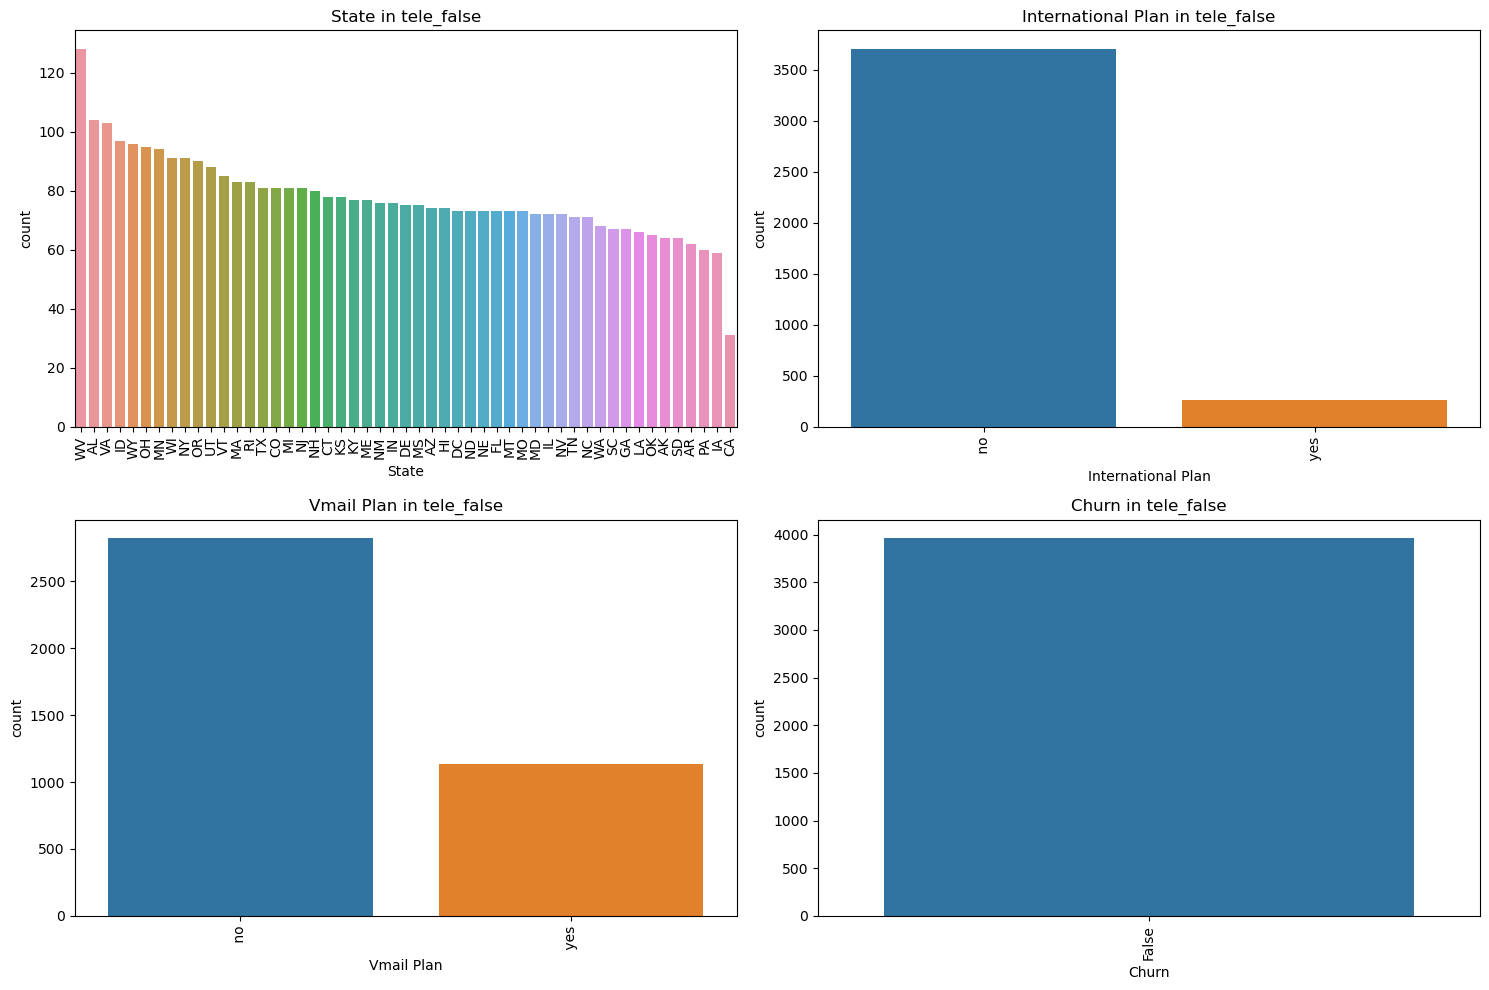

In [33]:
# Select categorical columns in tele_false
cat_cols = tele_false.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2  # You can adjust this based on your preference
num_rows = (len(cat_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot count plots for each categorical variable in tele_false
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=tele_false, order=tele_false[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{column} in tele_false')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Observations: 
- Top 3 states which are not churning:
    - WV
    - AL
    - VA
- Around 250 customers have International Plan are not churning.
- Around 1000 customers have Vmail Plan are not churning.

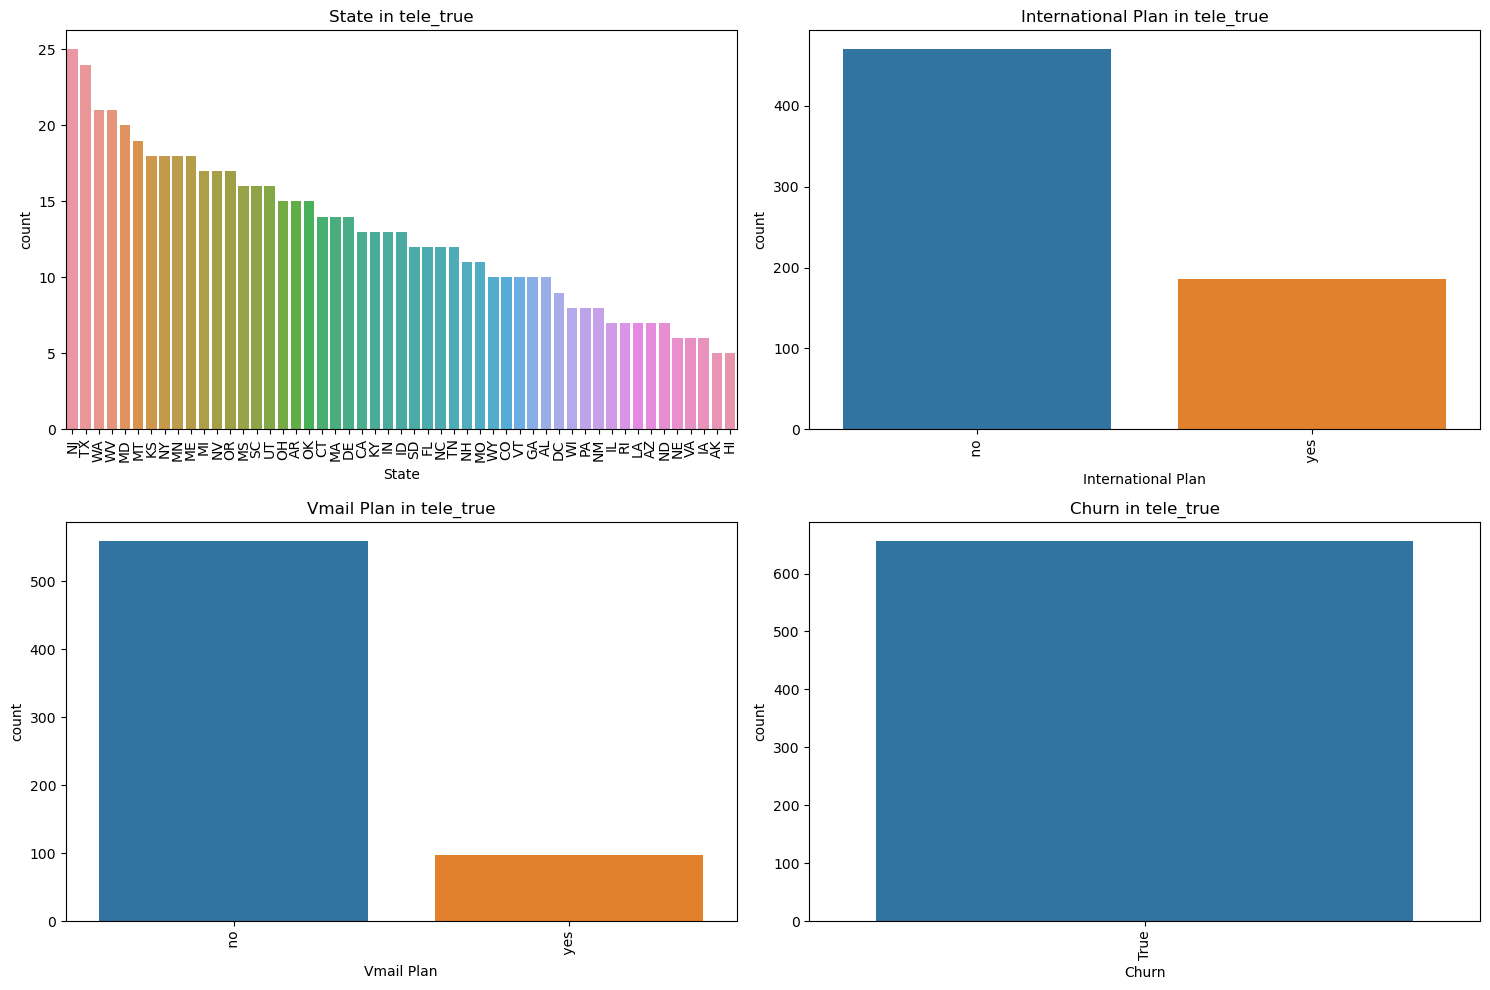

In [34]:
# Select categorical columns in tele_true
cat_cols = tele_true.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2  # You can adjust this based on your preference
num_rows = (len(cat_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot count plots for each categorical variable in tele_false
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=tele_true, order=tele_true[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{column} in tele_true')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Observations:
- Top 3 state where churn is high:
    - NI
    - TX
    - WA
- Almost 200 customers are having international plan.
- Almost 100 customers are having Vmail Plan.

In [35]:
tele_false = tele.loc[tele['Churn'] == 'False']
tele_false 

,State,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve charge,Night Mins,Night Calls,Night charge,International Mins,International calls,International charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False
4613,NM,177,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False


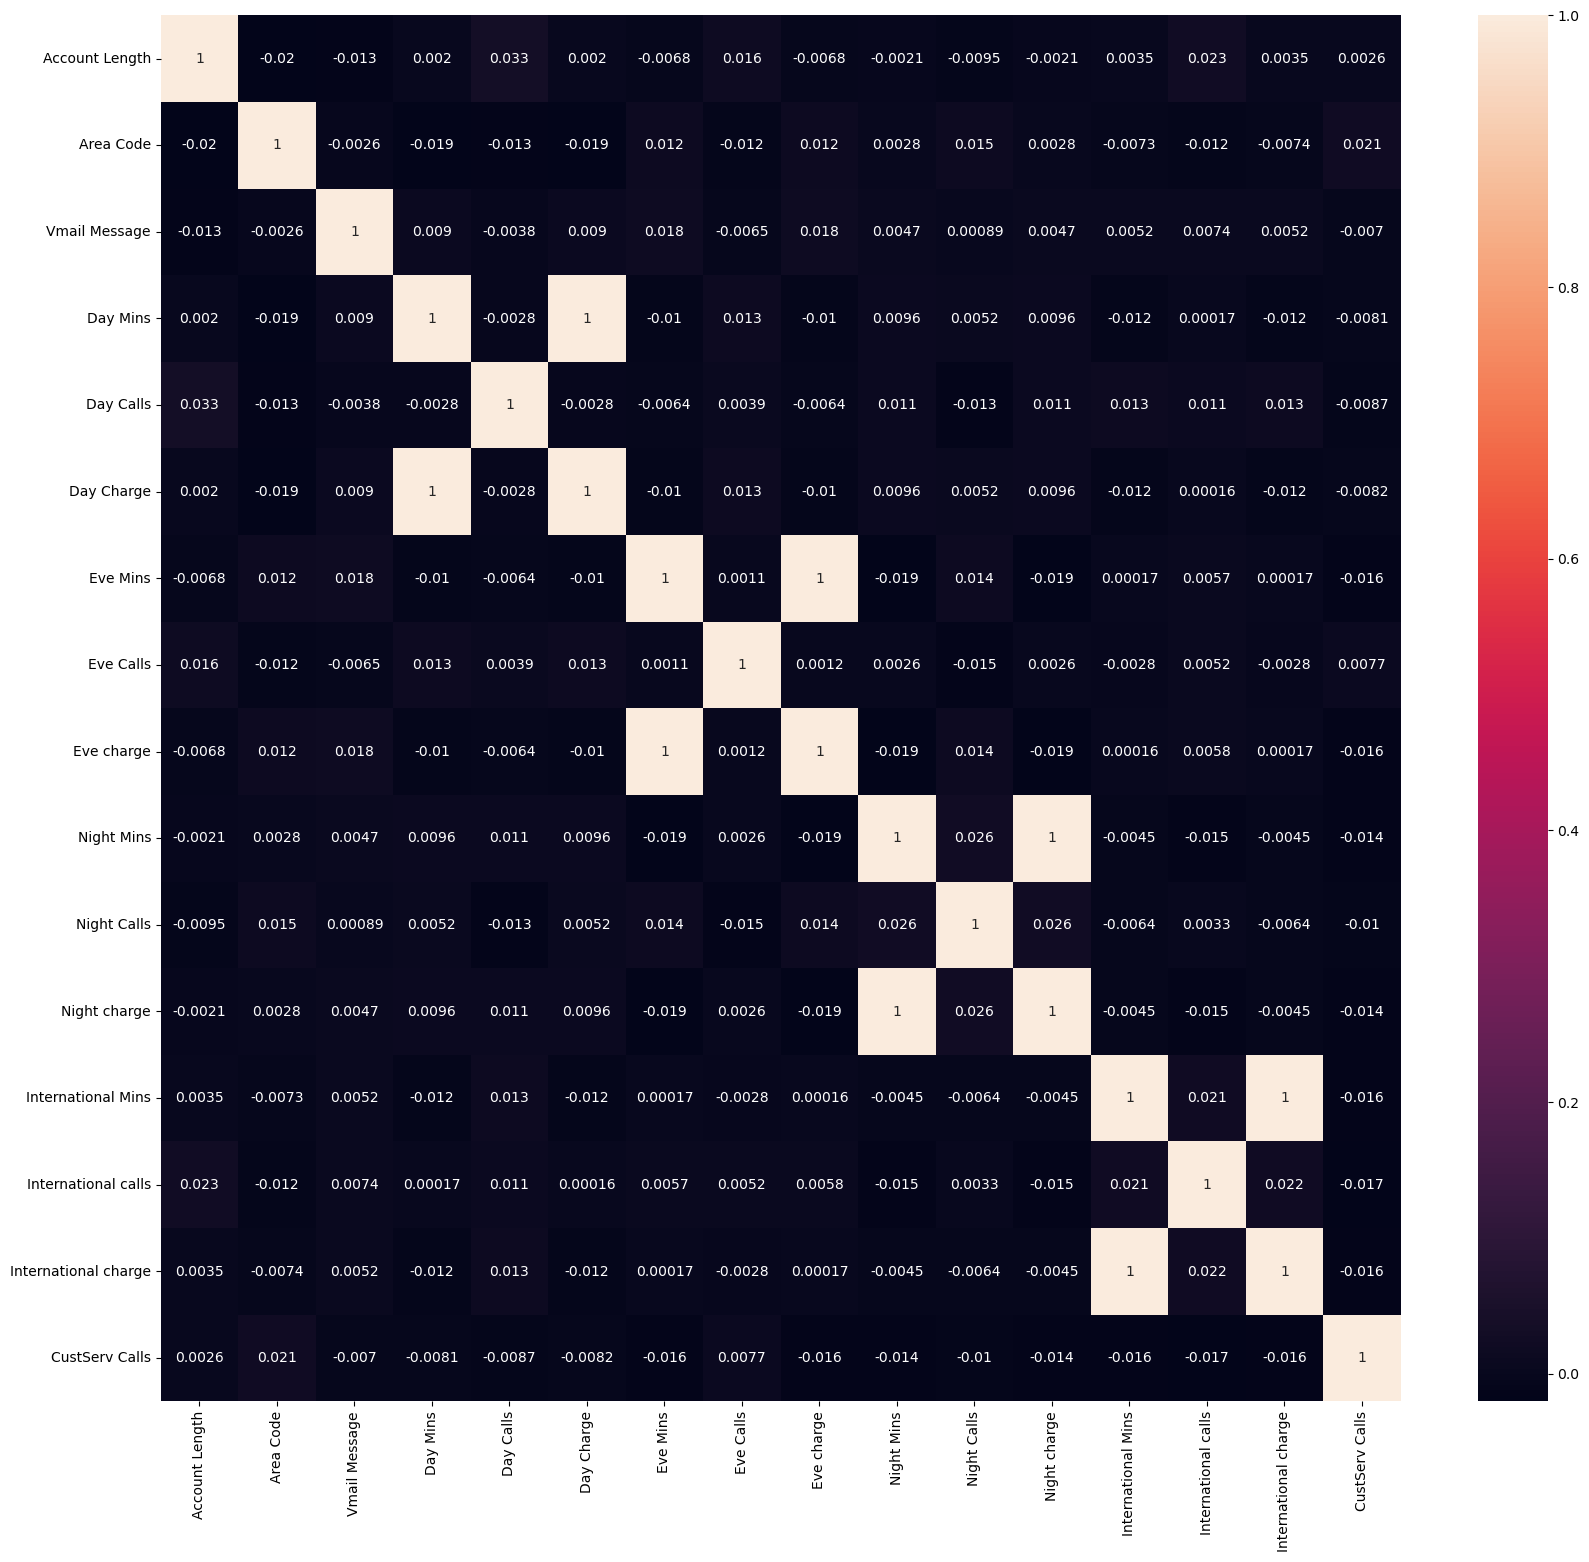

In [36]:
# Set the figure size to 20x18 inches
plt.figure(figsize=(20, 18))

# Create a heatmap of the correlation matrix of the 'data'
# cmap='rocket': Set the color map to the 'rocket' colormap
# annot=True: Display correlation coefficients in each cell
sns.heatmap(tele.corr(), cmap='rocket', annot=True)

# Display the plot
plt.show()

# Data Preprocessing

In [37]:
# Dropping columns having high correlation coefficient
tele.drop(['Day Charge', 'Eve charge', 'Night charge', 'International charge'], axis=1, inplace=True)

In [38]:
categorical_columns = tele.select_dtypes(include=['object']).columns
categorical_columns

Index(['State', 'International Plan', 'Vmail Plan', 'Churn'], dtype='object')

In [39]:
# Changing categorical data to Numeric data using LabelEncoder

categorical_columns = tele.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    tele[col] = label_encoder.fit_transform(tele[col])

In [40]:
tele

,State,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls,Churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.0,81,187.2,112,158.6,122,8.5,6,3,0
4613,32,177,408,0,1,29,189.0,91,303.1,96,163.6,116,15.7,1,3,0
4614,46,67,408,0,1,33,127.5,126,296.1,129,200.9,91,13.0,3,1,0
4615,22,98,415,0,1,23,168.9,98,226.3,117,165.5,96,14.3,3,0,0


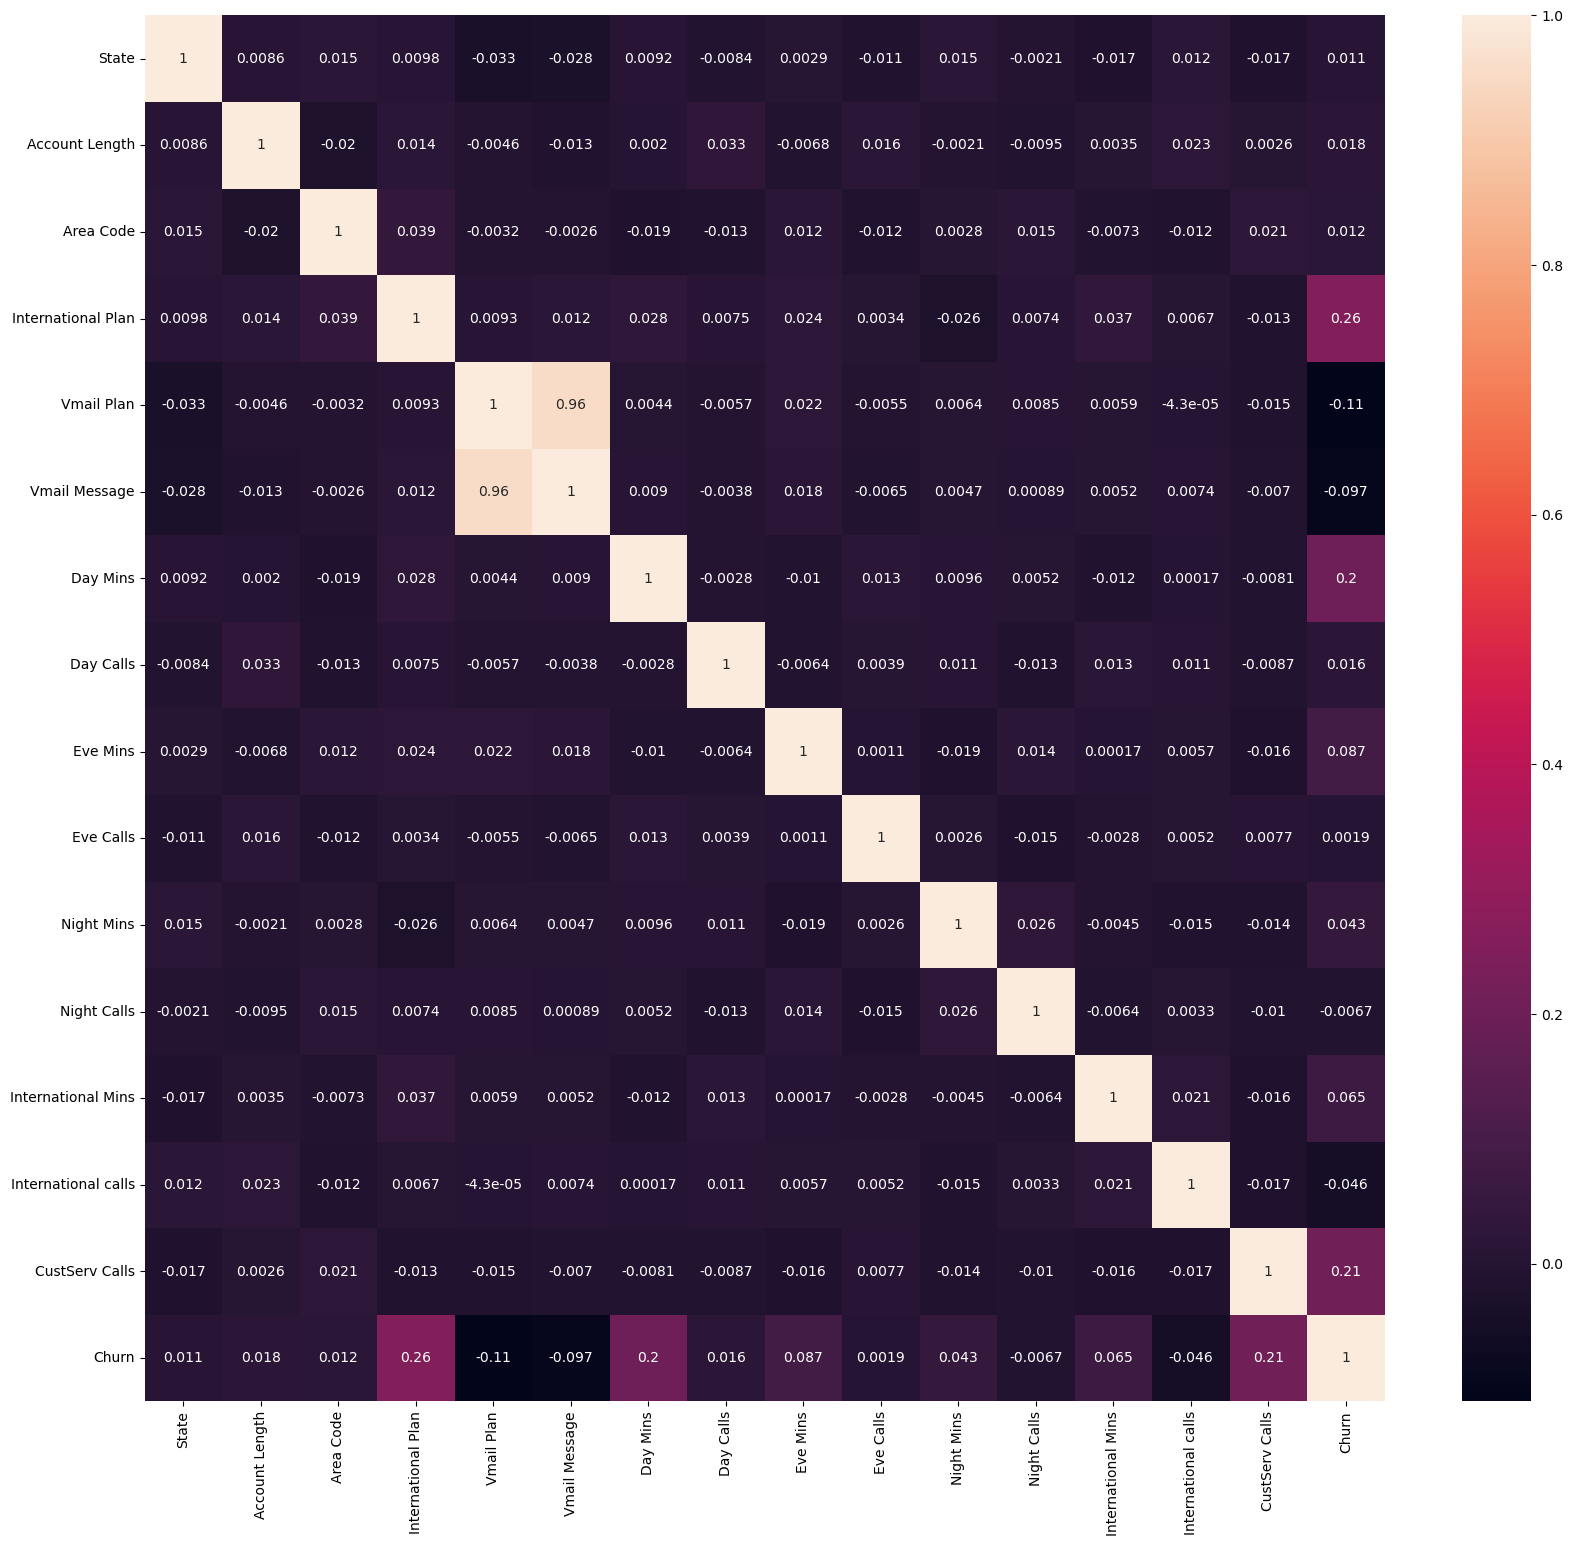

In [41]:
# Set the figure size to 20x18 inches
plt.figure(figsize=(20, 18))

# Create a heatmap of the correlation matrix of the 'data'
# cmap='rocket': Set the color map to the 'rocket' colormap
# annot=True: Display correlation coefficients in each cell
sns.heatmap(tele.corr(), cmap='rocket', annot=True)

# Display the plot
plt.show()

In [42]:
tele.drop('Vmail Message', axis=1, inplace=True)

In [43]:
# Separating Target Variable "Churn" from independent Variables/Features
X = tele.drop('Churn', axis=1)
y = tele.Churn

In [44]:
# Creating function to find outliers in column and replacing it with median
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    column[(column < lower_bound) | (column > upper_bound)] = column.median()

# Step 3: Apply the function to all numeric columns in the DataFrame
numeric_columns = X.select_dtypes(include=['number']).columns

for column in numeric_columns:
    handle_outliers_iqr(X[column])




In [45]:
X.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Vmail Plan', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls'],
      dtype='object')

In [46]:
# Applying scaling to all columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the data and store the result in the same variable
min_max_scaler = scaler.fit_transform(X)

final_scaled = pd.DataFrame(min_max_scaler, columns=['State', 'Account Length', 'Area Code', 'International Plan', 
                                                     'Vmail Plan', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
                                                     'Night Mins', 'Night Calls', 'International Mins',
                                                     'International calls', 'CustServ Calls'])

In [47]:
final_scaled

,State,Account Length,Area Code,International Plan,Vmail Plan,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls
0,0.32,0.622549,0.068627,0.0,1.0,0.789835,0.596154,0.489879,0.485981,0.661982,0.413462,0.474820,0.3,0.333333
1,0.70,0.519608,0.068627,0.0,1.0,0.434409,0.721154,0.482886,0.523364,0.697855,0.528846,0.741007,0.3,0.333333
2,0.62,0.666667,0.068627,0.0,0.0,0.715316,0.634615,0.209422,0.588785,0.358358,0.538462,0.633094,0.5,0.000000
3,0.70,0.406863,0.000000,0.0,0.0,0.907624,0.221154,0.502392,0.383178,0.485207,0.394231,0.230216,0.7,0.666667
4,0.72,0.362745,0.068627,0.0,0.0,0.451923,0.625000,0.309165,0.700935,0.448225,0.701923,0.482014,0.3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.68,0.274510,1.000000,0.0,1.0,0.373970,0.317308,0.452337,0.607477,0.343565,0.711538,0.366906,0.6,1.000000
4613,0.64,0.862745,0.000000,0.0,1.0,0.528503,0.413462,0.878911,0.457944,0.362056,0.653846,0.884892,0.1,1.000000
4614,0.92,0.323529,0.000000,0.0,1.0,0.317308,0.750000,0.853147,0.766355,0.500000,0.413462,0.690647,0.3,0.333333
4615,0.44,0.475490,0.068627,0.0,1.0,0.459478,0.480769,0.596246,0.654206,0.369083,0.461538,0.784173,0.3,0.000000


In [48]:
# Splitting the data into Train and Test data
# Train data will be used to train model
# Test data will be used to check trained model and to evaulate the model
X_train, X_test, y_train, y_test = train_test_split(final_scaled, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [49]:
X_train

,State,Account Length,Area Code,International Plan,Vmail Plan,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls
3189,0.94,0.367647,1.000000,0.0,0.0,0.726992,0.596154,0.522635,0.149533,0.527737,0.721154,0.705036,0.5,0.000000
2646,0.54,0.490196,0.068627,0.0,0.0,0.678571,0.634615,0.449393,0.710280,0.323964,0.711538,0.582734,0.6,0.333333
506,0.70,0.661765,0.068627,0.0,1.0,0.370879,0.384615,0.634155,0.168224,0.599482,0.692308,0.575540,0.5,0.666667
393,0.76,0.544118,1.000000,0.0,0.0,0.625000,0.269231,0.518587,0.495327,0.443787,0.413462,0.431655,0.3,0.666667
1183,0.30,0.750000,1.000000,0.0,1.0,0.539835,0.326923,0.371734,0.813084,0.515163,0.250000,0.402878,0.1,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.86,0.446078,1.000000,0.0,0.0,0.704327,0.365385,0.159367,0.299065,0.336169,0.701923,0.294964,0.4,0.333333
466,0.18,0.642157,1.000000,0.0,1.0,0.656250,0.528846,0.431726,0.728972,0.714127,0.519231,0.510791,0.5,1.000000
3092,0.50,0.328431,0.068627,0.0,0.0,0.202610,0.432692,0.306588,0.308411,0.546598,0.355769,0.482014,0.2,0.000000
3772,0.48,0.480392,0.000000,0.0,0.0,0.543269,0.028846,0.647037,0.654206,0.295858,0.423077,0.633094,0.4,0.333333


In [50]:
X_test

,State,Account Length,Area Code,International Plan,Vmail Plan,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls
2264,0.20,0.083333,0.000000,0.0,0.0,0.555975,0.471154,0.513066,0.560748,0.504068,0.548077,0.381295,0.3,1.000000
1839,0.02,0.338235,0.068627,0.0,0.0,0.670330,0.596154,0.050055,0.373832,0.670858,0.548077,0.705036,0.4,0.333333
2525,0.84,0.460784,1.000000,0.0,0.0,0.476992,0.086538,0.797939,0.663551,0.486317,0.442308,0.453237,0.2,0.000000
23,0.80,0.539216,0.068627,0.0,0.0,0.258585,0.528846,0.268679,0.514019,0.458210,0.548077,0.309353,0.6,0.666667
1831,0.70,0.450980,0.068627,0.0,1.0,0.402473,0.403846,0.747884,0.514019,0.744083,0.788462,0.568345,0.5,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.26,0.666667,1.000000,0.0,0.0,0.576923,0.471154,0.249172,0.271028,0.684911,0.442308,0.417266,0.4,0.333333
4537,0.74,0.485294,0.068627,0.0,1.0,0.111951,0.182692,0.304748,0.644860,0.823225,0.528846,0.640288,0.2,0.333333
1965,0.68,0.676471,1.000000,0.0,0.0,0.691964,0.586538,0.388664,0.560748,0.542160,0.673077,0.553957,0.2,0.333333
2114,0.86,0.598039,0.000000,0.0,0.0,0.775412,0.355769,0.383511,0.523364,0.416420,0.413462,0.712230,0.5,1.000000


In [51]:
y_train

3189    1
2646    0
506     0
393     0
1183    0
       ..
4426    0
466     1
3092    0
3772    0
860     0
Name: Churn, Length: 3693, dtype: int32

In [52]:
 y_test

2264    0
1839    0
2525    0
23      0
1831    0
       ..
4405    0
4537    1
1965    1
2114    0
2990    0
Name: Churn, Length: 924, dtype: int32

In [53]:
print("Size of training observations: ", X_train.shape)
print("Size of test data: ", X_test.shape)

Size of training observations:  (3693, 14)
Size of test data:  (924, 14)


In [54]:
# Checking the number of observations which supports "yes" or "no" category
y_train.value_counts()

0    3162
1     531
Name: Churn, dtype: int64

- Data is highly unbalanced
- Observations of "1" are very low

In [55]:
# Apply SMOTE Technique to balance the data
from imblearn.over_sampling import SMOTE
from collections import Counter

In [56]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 3162, 1: 531})
SMOTE Classes Counter({1: 3162, 0: 3162})


#  Logistic Regression

In [57]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training dataset
model.fit(X_smote, y_smote)

LogisticRegression()

In [58]:
# Make predictions on the test data
y_pred_log = model.predict(X_test)

In [59]:
# Evaluation matrics to evaluate trained model on the test dataset
accuracy1 = accuracy_score(y_test, y_pred_log)*100
conf_matrix1 = confusion_matrix(y_test, y_pred_log)
class_report1 = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy1:.2f}")
print("Confusion Matrix:")
print(conf_matrix1)
print("Classification Report:")
print(class_report1)

Accuracy: 59.09
Confusion Matrix:
[[471 328]
 [ 50  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       799
           1       0.19      0.60      0.28       125

    accuracy                           0.59       924
   macro avg       0.55      0.59      0.50       924
weighted avg       0.81      0.59      0.66       924



# Logistics Regression with Hypertunning

In [60]:
# Create a logistic regression model
logreg = LogisticRegression()

# Define the hyperparameters and their potential values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [61]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [62]:
# Evaluate the model with the best hyperparameter on the test set
best_model = grid_search.best_estimator_
y_pred_log_hyper = best_model.predict(X_test)

In [63]:
# Evaluation matrics to evaluate trained model on the test dataset
accuracy2 = accuracy_score(y_test,y_pred_log_hyper)*100
conf_matrix2 = confusion_matrix(y_test,y_pred_log_hyper)
class_report2 = classification_report(y_test,y_pred_log_hyper)
print(f"Accuracy:{accuracy2:.2f}")
print("Confusion Matrix:")
print(conf_matrix2)
print("classfication Report:")
print(class_report2)

Accuracy:56.39
Confusion Matrix:
[[430 369]
 [ 34  91]]
classfication Report:
              precision    recall  f1-score   support

           0       0.93      0.54      0.68       799
           1       0.20      0.73      0.31       125

    accuracy                           0.56       924
   macro avg       0.56      0.63      0.50       924
weighted avg       0.83      0.56      0.63       924



 # KNN

In [64]:
## taking optimal k to determine how many nearest to create 

# create a list to store the error values for each k 

error_rate = []
# will take some time

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test)) # it calculates the proportion of misclassified samples in the test set
    

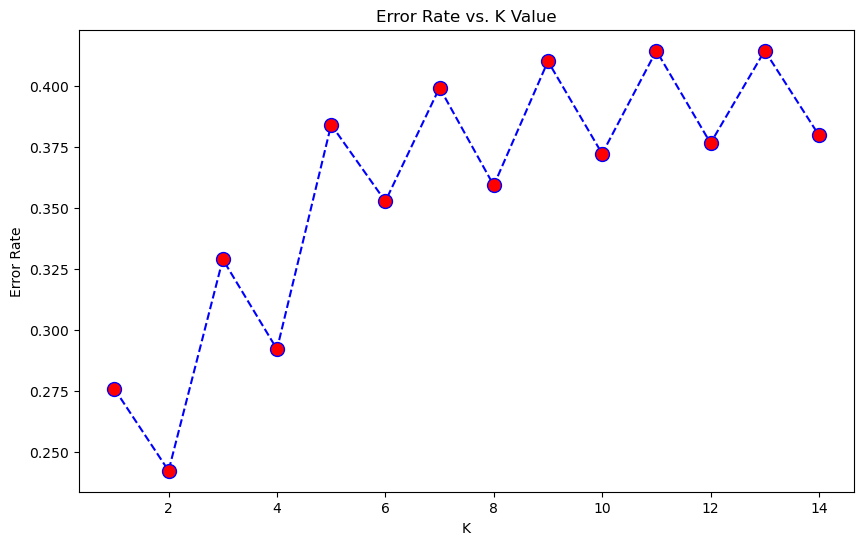

In [65]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [66]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_smote, y_smote)
    Y_pred = knn2.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Y_pred))

Maximum accuracy: 0.7575757575757576 at K = 1


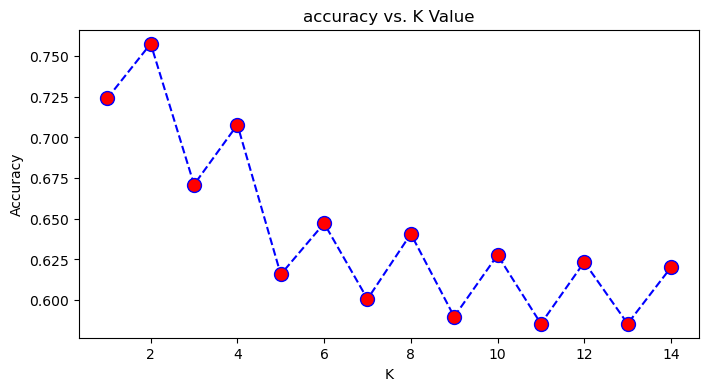

In [67]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 15),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)))

In [68]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred_knn = knn.predict(X_test)

In [70]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy3 = accuracy_score(y_test, y_pred_knn)*100
conf_matrix3 = confusion_matrix(y_test, y_pred_knn)
class_report3 = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy3:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix3)
print("\nClassification Report:\n")
print(class_report3)

Accuracy: 62.01

Confusion Matrix:

[[500 299]
 [ 52  73]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.63      0.74       799
           1       0.20      0.58      0.29       125

    accuracy                           0.62       924
   macro avg       0.55      0.60      0.52       924
weighted avg       0.81      0.62      0.68       924



# Support Vector Machine

In [71]:
# Initialise the objective of model 
svclassifier = SVC() 

# Fit the model with training data
svclassifier.fit(X_smote, y_smote)

SVC()

In [72]:
# Predict the output using trained data
y_pred_svm = svclassifier.predict(X_test)

In [73]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy4 = accuracy_score(y_test, y_pred_svm)*100
conf_matrix4 = confusion_matrix(y_test, y_pred_svm)
class_report4 = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy4:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix4)
print("\nClassification Report:\n")
print(class_report4)

Accuracy: 71.54

Confusion Matrix:

[[609 190]
 [ 73  52]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       799
           1       0.21      0.42      0.28       125

    accuracy                           0.72       924
   macro avg       0.55      0.59      0.55       924
weighted avg       0.80      0.72      0.75       924



# Decision Tree

In [74]:
# Initialise the model objective
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [75]:
# Predict the output for test dataset
y_pred_tree = dt.predict(X_test)

In [76]:
accuracy5 = accuracy_score(y_test, y_pred_tree)*100
conf_matrix5 = confusion_matrix(y_test, y_pred_tree)
class_report5 = classification_report(y_test, y_pred_tree)

print(f"Accuracy: {accuracy5:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix5)
print("\nClassification Report:\n")
print(class_report5)

Accuracy: 80.19

Confusion Matrix:

[[701  98]
 [ 85  40]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       799
           1       0.29      0.32      0.30       125

    accuracy                           0.80       924
   macro avg       0.59      0.60      0.59       924
weighted avg       0.81      0.80      0.81       924



# Decision Tree Hyperparameter

In [77]:
%%time
# Print time taken to execute this cell

# Dictionary of parameter to try and test for decision tree 
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4, 5, 6, 7],     
    "min_samples_leaf":list(range(1, 10))
    
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, 
                       scoring="accuracy",           # Evaluation metric to evaluate the model
                       n_jobs=-1,                    # Numbers of cores used to execute this code
                       verbose=1, cv=3)

# Fit the model with each parameters
tree_cv.fit(X_train, y_train)

# It will print Best Parameters
best_params = tree_cv.best_params_ 
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4104 candidates, totalling 12312 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'random'})
CPU times: total: 13 s
Wall time: 1min 38s


In [78]:
# Passing best parameter to decision tree
dt1 = DecisionTreeClassifier(**best_params)

# Training model with best parameter
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       splitter='random')

In [79]:
# Predicton using Decision Tree
y_pred_hyper_decision = dt1.predict(X_test)

In [80]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy6 = accuracy_score(y_test, y_pred_hyper_decision)*100
conf_matrix6 = confusion_matrix(y_test, y_pred_hyper_decision)
class_report6 = classification_report(y_test, y_pred_hyper_decision)

print(f"Accuracy: {accuracy6:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix6)
print("\nClassification Report:\n")
print(class_report6)

Accuracy: 88.20

Confusion Matrix:

[[788  11]
 [ 98  27]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       799
           1       0.71      0.22      0.33       125

    accuracy                           0.88       924
   macro avg       0.80      0.60      0.63       924
weighted avg       0.87      0.88      0.85       924



# Random Forest Algorithm

In [81]:
# Object creation, taking 200 decision tree in random forest 
rf_clf = RandomForestClassifier(n_estimators=100) 

# Training model
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
# Prediction using Random Forest Algorithm
y_pred_forest = rf_clf.predict(X_test)

In [83]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy7 = accuracy_score(y_test, y_pred_forest)*100
conf_matrix7 = confusion_matrix(y_test, y_pred_forest)
class_report7 = classification_report(y_test, y_pred_forest)

print(f"Accuracy: {accuracy7:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix7)
print("\nClassification Report:\n")
print(class_report7)

Accuracy: 88.74

Confusion Matrix:

[[796   3]
 [101  24]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       799
           1       0.89      0.19      0.32       125

    accuracy                           0.89       924
   macro avg       0.89      0.59      0.63       924
weighted avg       0.89      0.89      0.85       924



# Radom Forest with Hypertuning 

In [84]:
%%time
# Time taken to execute this cell

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 88.98%
CPU times: total: 14.8 s
Wall time: 19min 5s


In [85]:
# It will train model with Best Parameters
best_params1 = grid_search.best_params_ 
rf_clf2 = RandomForestClassifier(**best_params1)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [86]:
y_pred_hyper_forest = rf_clf2.predict(X_test)

In [87]:
accuracy8 = accuracy_score(y_test, y_pred_hyper_forest)*100
conf_matrix8 = confusion_matrix(y_test, y_pred_hyper_forest)
class_report8 = classification_report(y_test, y_pred_hyper_forest)

print(f"Accuracy: {accuracy8:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix8)
print("\nClassification Report:\n")
print(class_report8)

Accuracy: 89.50

Confusion Matrix:

[[794   5]
 [ 92  33]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       799
           1       0.87      0.26      0.40       125

    accuracy                           0.90       924
   macro avg       0.88      0.63      0.67       924
weighted avg       0.89      0.90      0.87       924



# Bagging Algorithm with Logistic Regression

In [88]:
LR = LogisticRegression()

In [89]:
# Initialise the Bagging Classifier Model using base model of Logistic Regression
model_bagg = BaggingClassifier(base_estimator = LR, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [90]:
y_pred_bagg_log = model_bagg.predict(X_test)

In [91]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy9 = accuracy_score(y_test, y_pred_bagg_log)*100
conf_matrix9 = confusion_matrix(y_test, y_pred_bagg_log)
class_report9 = classification_report(y_test, y_pred_bagg_log)

print(f"Accuracy: {accuracy9:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix9)
print("\nClassification Report:\n")
print(class_report9)

Accuracy: 86.80

Confusion Matrix:

[[799   0]
 [122   3]]

Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       799
           1       1.00      0.02      0.05       125

    accuracy                           0.87       924
   macro avg       0.93      0.51      0.49       924
weighted avg       0.89      0.87      0.81       924



In [92]:
# Define logistic regression model
logistic_regression = LogisticRegression()

# Define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Perform grid search
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", best_params)

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [93]:
logistic_regression = LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [94]:
y_pred_bagg_log = grid_search.predict(X_test)

In [95]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy10 = accuracy_score(y_test, y_pred_bagg_log)*100
conf_matrix10 = confusion_matrix(y_test, y_pred_bagg_log)
class_report10 = classification_report(y_test, y_pred_bagg_log)

print(f"Accuracy: {accuracy10:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix10)
print("\nClassification Report:\n")
print(class_report10)

Accuracy: 86.80

Confusion Matrix:

[[799   0]
 [122   3]]

Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       799
           1       1.00      0.02      0.05       125

    accuracy                           0.87       924
   macro avg       0.93      0.51      0.49       924
weighted avg       0.89      0.87      0.81       924



# Boosting Technique

In [96]:
# Initialise the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Fit the Gradient Boosting Classifier
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
y_pred_gbm = gbm.predict(X_test)

In [98]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy11 = accuracy_score(y_test, y_pred_gbm)*100
conf_matrix11 = confusion_matrix(y_test, y_pred_gbm)
class_report11 = classification_report(y_test, y_pred_gbm)

print(f"Accuracy: {accuracy11:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix11)
print("\nClassification Report:\n")
print(class_report11)

Accuracy: 88.74

Confusion Matrix:

[[787  12]
 [ 92  33]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       799
           1       0.73      0.26      0.39       125

    accuracy                           0.89       924
   macro avg       0.81      0.62      0.66       924
weighted avg       0.87      0.89      0.86       924



In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [100]:
param_grid = {'gamma': [0,0.1, 0.2, 0.4, 0.8, 1.6, 3.2],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2],
              'max_depth': [5, 6, 7, 8, 9, 10],
              'n_estimators': [50, 100, 150, 200],
              'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4],
              'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6]}

XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)
rcv = RandomizedSearchCV(estimator=XGB, 
                        scoring='accuracy', 
                        param_distributions=param_grid, 
                        n_iter=100, 
                        cv=3, 
                        verbose=2, 
                        random_state=42, 
                        n_jobs=-1)

rcv.fit(X_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 3.2, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.1})


In [101]:
# Building model using best parameter
XGB2 = XGBClassifier(reg_lambda=1.6, reg_alpha=1.6, n_estimators=50, max_depth=5, learning_rate=0.2, gamma=0.4)
XGB2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [102]:
y_pred_hyper_XGB = XGB2.predict(X_test)

In [103]:
accuracy12 = accuracy_score(y_test, y_pred_hyper_XGB)*100
conf_matrix12 = confusion_matrix(y_test, y_pred_hyper_XGB)
class_report12 = classification_report(y_test, y_pred_hyper_XGB)

print(f"Accuracy: {accuracy12:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix12)
print("\nClassification Report:\n")
print(class_report12)

Accuracy: 89.61

Confusion Matrix:

[[791   8]
 [ 88  37]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       799
           1       0.82      0.30      0.44       125

    accuracy                           0.90       924
   macro avg       0.86      0.64      0.69       924
weighted avg       0.89      0.90      0.87       924



# Results

In [104]:
Models = [
    'Logistic Regression', 'Logistic Regression (Tuned)',
    'KNN (Tuned)', 'SVC', 'Decision Tree', 'Decision Tree (Tuned)',
    'Random Forest', 'Random Forest (Tuned)', 'Bagging with Logistics Regression',
    'Bagging with Logistics Regression (Tuned)', 
    'Boosting Technique', 'Boosting Technique (Tuned)'    
         ]

Accuracy = [accuracy1, accuracy2, accuracy3, accuracy4,
           accuracy5, accuracy6, accuracy7, accuracy8,
           accuracy9, accuracy10, accuracy11, accuracy12]

result = pd.DataFrame({'Models':Models, 'Accuracy Score':Accuracy})
result

,Models,Accuracy Score
0,Logistic Regression,59.090909
1,Logistic Regression (Tuned),56.385281
2,KNN (Tuned),62.012987
3,SVC,71.536797
4,Decision Tree,80.194805
5,Decision Tree (Tuned),88.203463
6,Random Forest,88.744589
7,Random Forest (Tuned),89.502165
8,Bagging with Logistics Regression,86.796537
9,Bagging with Logistics Regression (Tuned),86.796537


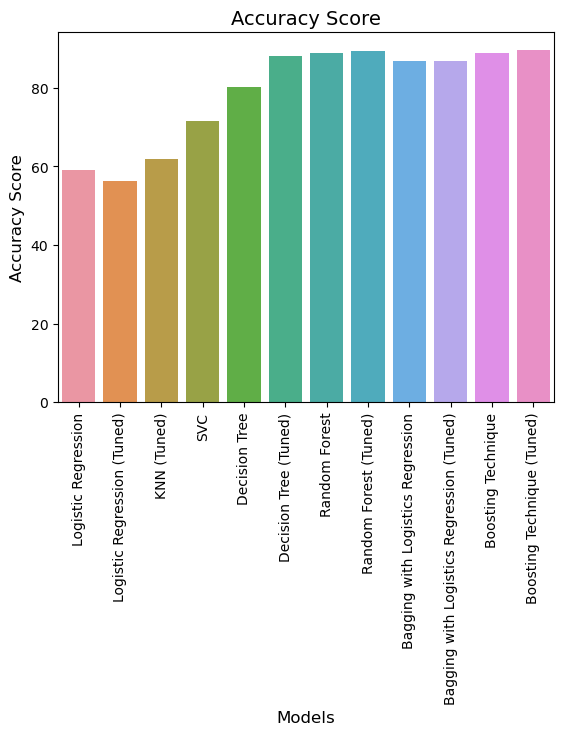

In [105]:
sns.barplot(x='Models', y='Accuracy Score', data=result)
plt.xlabel('Models', fontsize=12)  
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Accuracy Score', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [108]:
with open('model.pkl','wb') as file:
    pickle.dump('result',file)
    